In [1]:
# Import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


# Data

Berikut adalah 5 data pertama pada dataset Daegu Apartment:

In [2]:
# Load dataset

df=pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
# Jumlah dan tipe data pada setiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
# Data unik pada feature TimeToSubway

df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [5]:
# Mengubah format penulisan pada feature TimeToSubway

df.loc[df['TimeToSubway']=='5min~10min','TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway']=='10min~15min','TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway']=='15min~20min','TimeToSubway']='15min-20min'

Sebelumnya, kita akan melakukan penggantian format penulisan pada kolom TimeToSubway yang pada awalnya menggunakan '~' menjadi '-'. Penggantian format penulisan dilakukan untuk menyamakan format penulisan dan menghindari kekeliruan penulisan.

# Explanatory Data Analysis

**Statistic Summary**

In [6]:
df.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123,4123,4123,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
unique,3,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,0-5min,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2528,1953,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,NaN,NaN,NaN,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,NaN,NaN,NaN,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000


In [7]:
# Jumlah data unik feature HallwayType

df['HallwayType'].value_counts()

terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64

In [8]:
# Jumlah data unik feature TimeToSubway

df['TimeToSubway'].value_counts()

0-5min                1953
5min-10min             787
15min-20min            629
10min-15min            583
no_bus_stop_nearby     171
Name: TimeToSubway, dtype: int64

In [9]:
# Jumlah data unik feature SubwayStation

df['SubwayStation'].value_counts()

Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Secara umum informasi yang didapatkan berdasarkan data di atas adalah sebagai berikut:

Terdapat 4.123 data dengan 11 feature pada dataset.
Tipe apartment terbanyak adalah apartment berteras (61,3%), lalu disusul oleh apartment mixed (27,4%) dan apartment berkoridor (11,3%).
Mayoritas apartment di Daegu cukup dekat dengan stasiun karena mayoritas hanya membutuhkan 0-5 menit menuju stasiun dan Stasiun Kyungbuk Uni Hospital merupakan stasiun yang paling dekat dengan mayoritas apartment.
Apartment di Daegu memiliki rata-rata 2 fasilitas, 4 kantor publik, 3 universitas, dan 569 tempat parkir basement terdekat.
Rata-rata apartment di Daegu dibangun pada tahun 2003 atau dapat dikatakan cukup tua karena apartment tertua di Daegu dibangun pada tahun 1978 dan apartment yang paling baru dibangun pada tahun 2015.
Apartment di Daegu memiliki rata-rata 6 fasilitas di dalam apartment dimana jumlah fasilitas dapat dikatakan cukup banyak karena jumlah fasilitas terbanyak di dalam apartment mencapai 10 fasilitas.
Ukuran apartment dan harga apartment di Daegu cukup bervariasi dengan rata-rata berukuran 954,63 square feet dan rata-rata harga 221.767,93 won sehingga rata-rata harga apartment di Daegu adalah 232,31 won/square feet.

# Distribusi Data

Kita akan melihat distribusi data dengan menggunakan histogram pada data kontinu yaitu tahun pembangunan apartment (YearBuilt), ukuran apartment (Size(sqf)), dan harga apartment (SalePrice).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

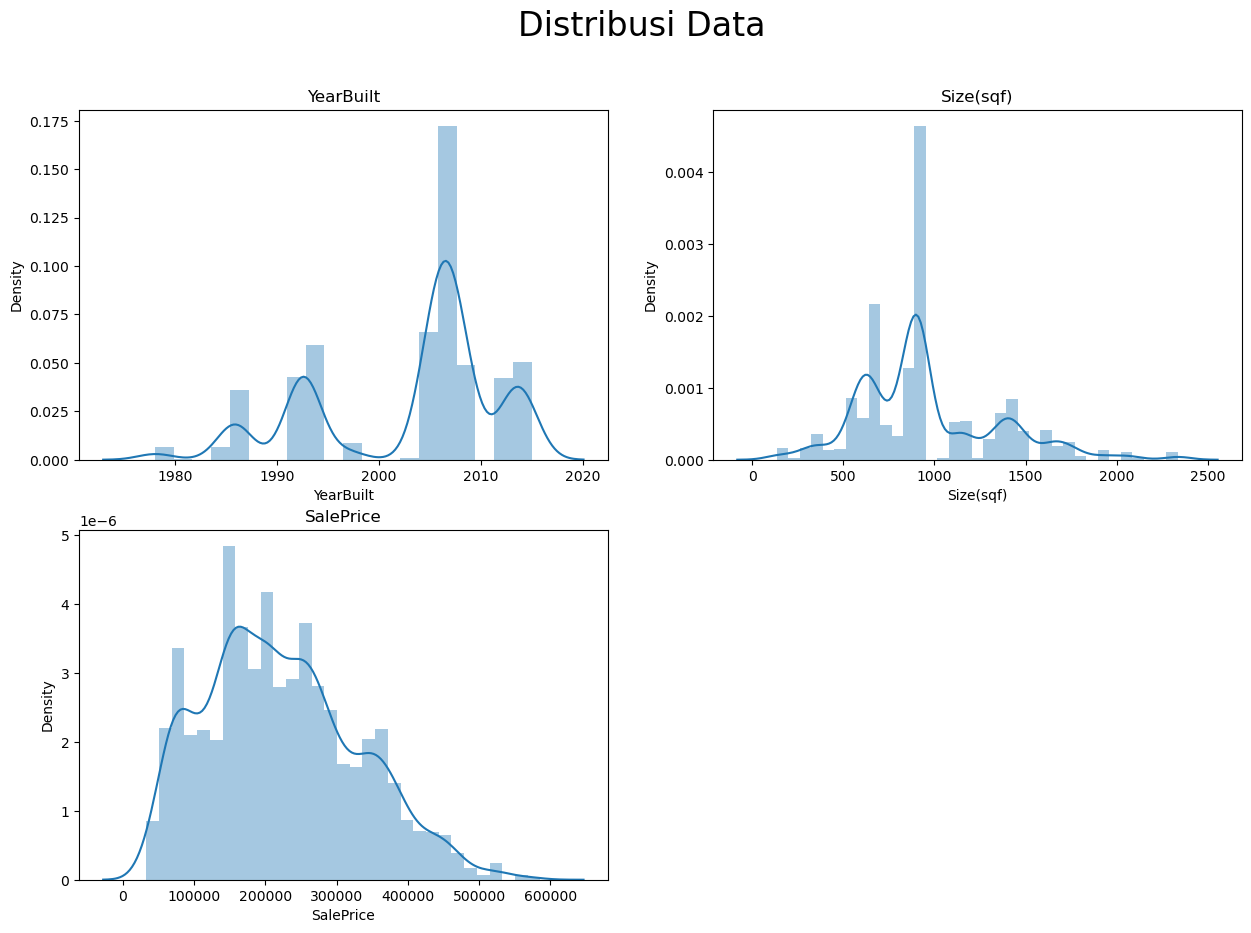

In [10]:
# Distribusi feature YearBuilt, Size(sqf), dan SalePrice

plt.figure(figsize=(15,10))

columns=['YearBuilt','Size(sqf)','SalePrice']

plotnumber=1
for kolom in columns:
    plt.subplot(2,2,plotnumber)
    sns.distplot(df[kolom])
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Distribusi Data',size=24)
plt.show()

In [11]:
# Normality test feature YearBuilt, Size(Sqf), dan SalePrice

column=['YearBuilt','Size(sqf)','SalePrice']

hasil=[]
for i in column:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        hasil.append('Distribusi normal')
    else:
        hasil.append('Tidak berdistribusi normal')

pd.DataFrame({'Kolom':column, 'Distribusi':hasil})

,Kolom,Distribusi
0,YearBuilt,Tidak berdistribusi normal
1,Size(sqf),Tidak berdistribusi normal
2,SalePrice,Tidak berdistribusi normal


In [12]:
# Skewness feature YearBuilt, Size(sqf), dan SalePrice

column=['YearBuilt','Size(sqf)','SalePrice']

hasil=[]
for i in column:
    hasil=skew(df[column])

pd.DataFrame({'Kolom':column, 'Skewness':hasil})

,Kolom,Skewness
0,YearBuilt,-0.806939
1,Size(sqf),0.875522
2,SalePrice,0.452157


1. Berdasarkan histogram dan normality test, kolom YearBuilt,Size(sqf), dan SalePrice tidak berdistribusi normal.
2. Berdasarkan histogram dan hasil skewness, YearBuilt memiliki skewness negatif sehingga berdistribusi skewed to the left yang artinya apartment di Daegu cenderung sudah tua karena sudah dibangun cukup lama sedangkan Size(sqf) dan SalePrice memiliki skewness positif sehingga berdistribusi skewed to the right yang artinya ukuran apartment di Daegu cenderung luas sehingga harganya juga cenderung mahal.

**Total Apartment**

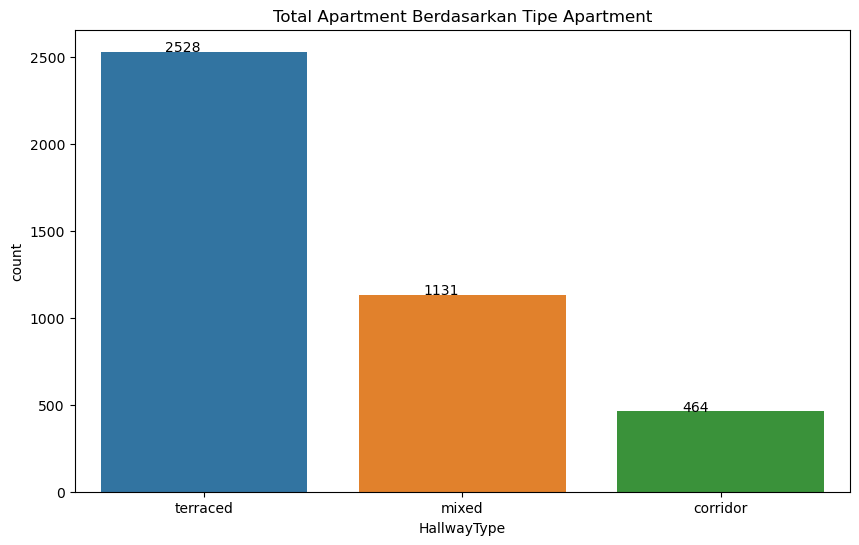

In [13]:
# Total apartment berdasarkan tipe apartment 

plt.figure(figsize = (10,6))
fig = sns.countplot(data = df,x='HallwayType',order = df['HallwayType'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Total Apartment Berdasarkan Tipe Apartment')
plt.show()

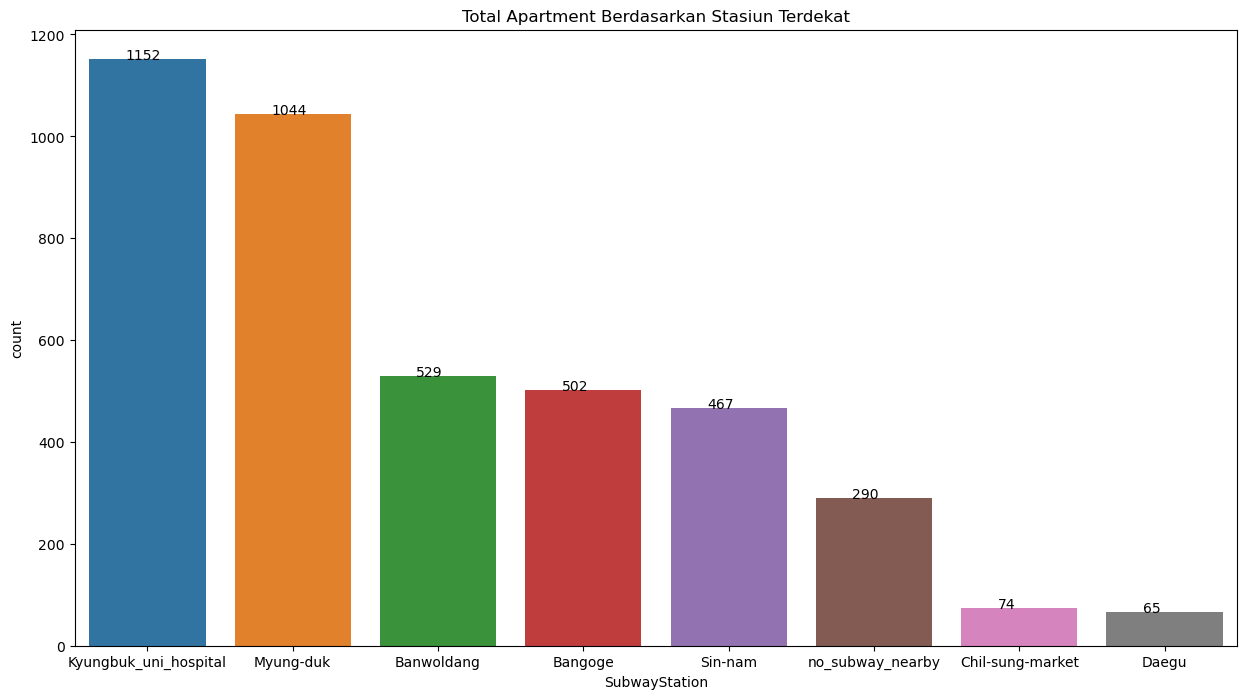

In [14]:
# Total tipe apartment berdasarkan stasiun subway terdekat

plt.figure(figsize = (15,8))
fig=sns.countplot(data=df,x='SubwayStation',order = df['SubwayStation'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Total Apartment Berdasarkan Stasiun Terdekat')
plt.show()

Mayoritas apartment yang dijual merupakan tipe terraced dan tipe mixed. Selain itu mayoritas apartment berada di dekat Stasiun Kyungbuk Uni Hospital, Stasiun Myungduk, dan Stasiun Banwoldang.

**Hubungan Tipe Apartemen, Ukuran, dan Jumlah Fasilitas di Apartmen Terhadap Harga Jual Apartemen**

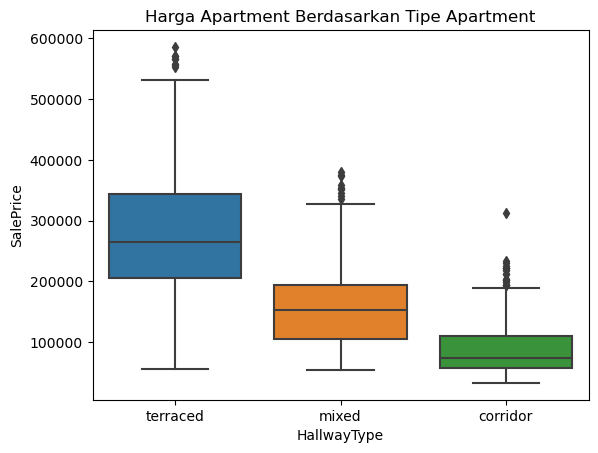

In [15]:
# Harga apartment berdasarkan tipe apartment

sns.boxplot(data=df,y='SalePrice',x='HallwayType').set_title('Harga Apartment Berdasarkan Tipe Apartment')

plt.show()

In [16]:
# Median harga apartment berdasarkan tipe apartment

df.groupby('HallwayType').median()['SalePrice'].sort_values(ascending=False)

HallwayType
terraced    264601.0
mixed       153539.0
corridor     74557.0
Name: SalePrice, dtype: float64

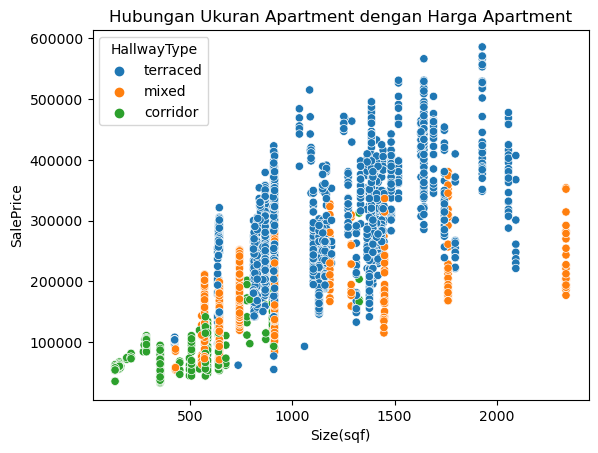

In [17]:
# Hubungan ukuran apartmen dengan harga apartment berdasarkan tipe apartment

sns.scatterplot(data=df,x='Size(sqf)',y='SalePrice',hue='HallwayType')
plt.title('Hubungan Ukuran Apartment dengan Harga Apartment')

plt.show()

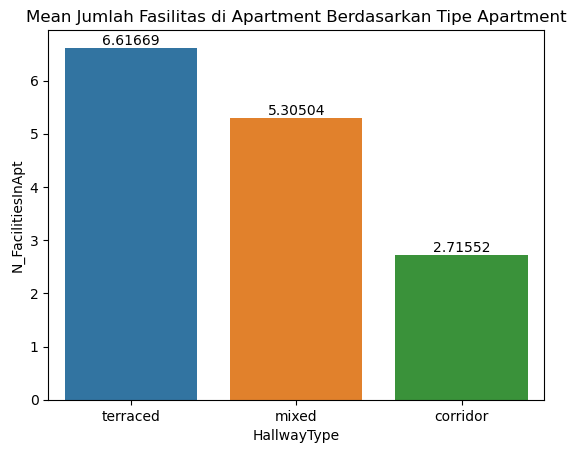

In [18]:
# Hubungan jumlah fasilitas di apartment dengan tipe apartment

ax=sns.barplot(data=df,y='N_FacilitiesInApt',x='HallwayType',ci=False)

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Mean Jumlah Fasilitas di Apartment Berdasarkan Tipe Apartment')
plt.show()

Semakin besar ukuran apartment maka akan semakin mahal harga apartment tersebut. Tipe apartment corridor merupakan tipe apartment terkecil sehingga memiliki harga yang termurah dibandingkan 2 tipe apartment lainnya. Sedangkan tipe apartment mixed dan terraced memiliki ukuran yang cukup bervariasi dari kecil hingga luas namun tipe apartment mixed memiliki harga yang lebih murah dibandingkan tipe apartment terraced.

Tipe apartment terraced memiliki jumlah fasilitas yang cenderung lebih banyak dibandingkan tipe apartment mixed dan tipe apartment corridor. Hal ini juga dapat menjadi salah satu penyebab tinggi harga apartment tipe terraced dibandingkan 2 tipe apartment lainnya (1,7 kali lipatnya tipe apartment mixed dan bahkan 3,5 kali lipatnya tipe apartment corridor).

**Hubungan Tahun pembangunan Apartemen Dengan Harga Jual Apartemen**

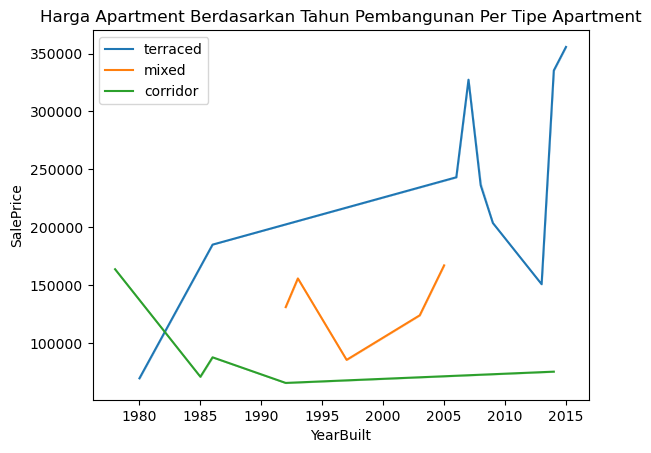

In [19]:
# Hubungan tahun pembangunan dengan harga apartment berdasarkan tipe apartment

sns.lineplot(data=df,x='YearBuilt',y='SalePrice',hue='HallwayType',ci=False,estimator=np.median)

plt.legend(loc=2)
plt.ticklabel_format(useOffset=False)
plt.title('Harga Apartment Berdasarkan Tahun Pembangunan Per Tipe Apartment')
plt.show()

Tipe apartment mixed baru mulai dibangun pada tahun 1992 namun semenjak tahun 2005 sudah tidak dibangun lagi. Tipe apartment terraced cenderung memiliki harga yang lebih tinggi pada unit yang baru dibangun namun menariknya untuk tipe apartment corridor, unit yang lebih lama dibangun cenderung memiliki harga yang lebih tinggi khususnya pada unit yang dibangun pada tahun 1980-an.

**Hubungan Stasiun Terdekat Dengan Harga Jual Apartemen**

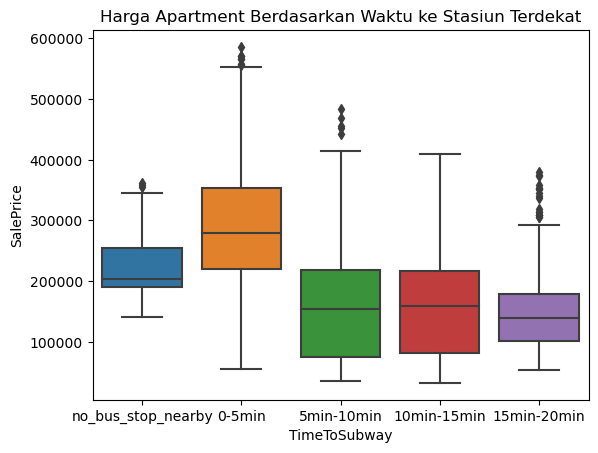

In [20]:
# Hubungan waktu ke stasiun subway terdekat dengan harga apartment

sns.boxplot(data=df,y='SalePrice',x='TimeToSubway',order=['no_bus_stop_nearby','0-5min','5min-10min','10min-15min','15min-20min']).set_title('Harga Apartment Berdasarkan Waktu ke Stasiun Terdekat')

plt.show()

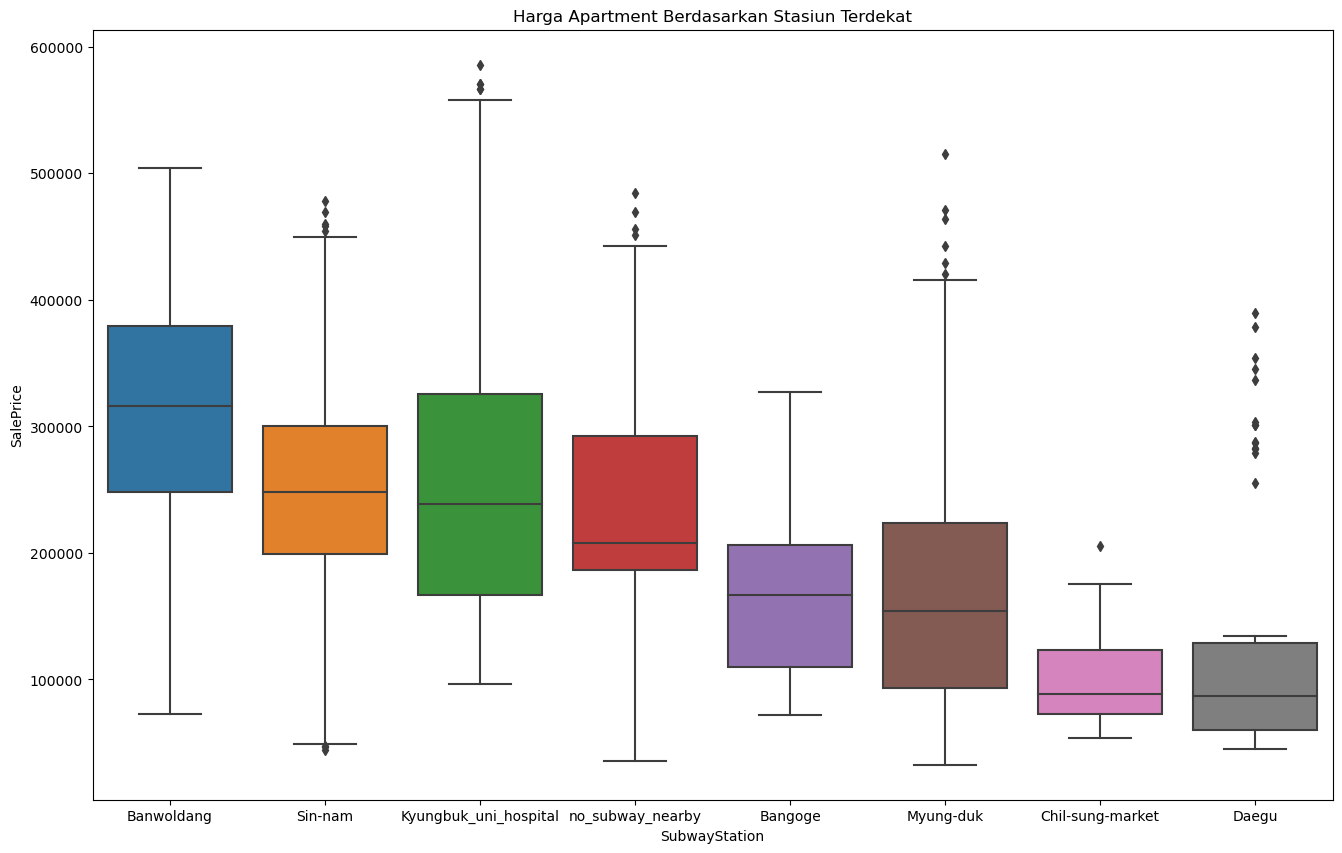

In [21]:
# Hubungan stasiun subway terdekat dengan harga apartment

plt.figure(figsize=(16,10))

station_grouped=df.groupby('SubwayStation').median()['SalePrice'].sort_values(ascending=False)

sns.boxplot(data=df,y='SalePrice',x='SubwayStation',order=station_grouped.index).set_title('Harga Apartment Berdasarkan Stasiun Terdekat')

plt.show()

In [22]:
# Median harga apartment berdasarkan waktu yang dibutuhkan menuju subway dan stasiun subway terdekat

TimeToSubway_grouped=df.groupby('TimeToSubway').median()['SalePrice'].sort_values(ascending=False)
SubwayStation_grouped=df.groupby('SubwayStation').median()['SalePrice'].sort_values(ascending=False)

print(TimeToSubway_grouped)
print(SubwayStation_grouped)

TimeToSubway
0-5min                279646.0
no_bus_stop_nearby    203646.0
10min-15min           159292.0
5min-10min            153539.0
15min-20min           138938.0
Name: SalePrice, dtype: float64
SubwayStation
Banwoldang               315929.0
Sin-nam                  247787.0
Kyungbuk_uni_hospital    238938.0
no_subway_nearby         207743.0
Bangoge                  167035.0
Myung-duk                154424.5
Chil-sung-market          88495.0
Daegu                     86725.0
Name: SalePrice, dtype: float64


<Figure size 1600x1000 with 0 Axes>

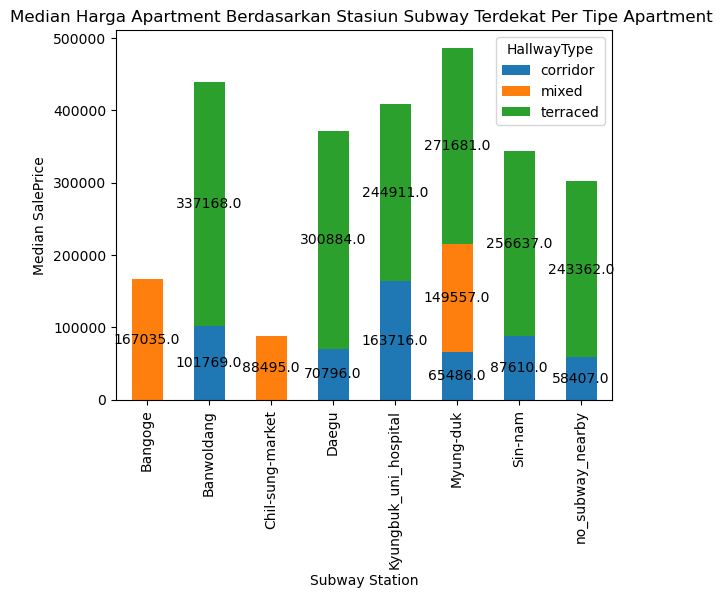

In [23]:
# Median harga apartment berdasarkan stasiun subway terdekat per tipe apartment

plt.figure(figsize=(16,10))

pivot=df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

stacked_plot=pivot.plot(kind='bar',stacked=True)
for i in stacked_plot.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    stacked_plot.bar_label(i, labels=labels, label_type='center')
plt.xlabel('Subway Station')

plt.ylabel('Median SalePrice')
plt.title('Median Harga Apartment Berdasarkan Stasiun Subway Terdekat Per Tipe Apartment ')
plt.show()

Semakin dekat apartment di Daegu dengan stasiun maka akan semakin mahal harga apartment tersebut, namun apartment yang tidak memiliki stasiun di sekitarnya tetap memiliki harga yang tinggi. Hal ini menunjukkan bahwa meskipun lokasi stasiun di dekat apartment mempengaruhi harga apartment, terdapat faktor lain yang juga mempengaruhi apartment untuk tetap memiliki harga yang tinggi.

Secara keseluruhan, 3 daerah yang memiliki harga tertinggi adalah apartment yang berada di sekitar Stasiun Banwoldang, Stasiun Sin-nam, dan Kyungbuk University Hostipal. Apartment yang berada di sekitar Stasiun Banwoldang memiliki harga 3,6 kali lipat dibandingkan apartment yang berada di sekitar Stasiun Daegu dan apartment yang berada di sekitar Stasiun Sin-Nam dan Stasiun Kyungbuk University Hospital memiliki harga 2,8 kali lipat dibandingkan apartment yang berada di sekitar Stasiun Daegu.

Berdasarkan median harga apartment berdasarkan stasiun subway terdekat per tipe apartment, apartment dengan tipe terraced selalu memiliki median harga yang tinggi sedangkan tipe corridor selalu memiliki median harga yang rendah di semua daerah. Hal ini menunjukkan bahwa terdapat demand yang cukup tinggi terhadap tipe apartment terraced di seluruh daerah.

# Data Preprocessing

Proses preprocessing adalah tahap penting dalam analisis data yang mencakup serangkaian teknik untuk membersihkan, memformat, dan mengubah data menjadi bentuk yang lebih mudah diolah oleh model atau algoritma machine learning. Beberapa hal yang perlu dilakukan dalam preprocessing adalah sebagai berikut:

Drop feature: Mendrop feature yang tidak relevan dengan permasalahan yang sedang dihadapi.
Menangani missing value: Melakukan pengecekan untuk mengetahui apakah terdapat data yang hilang atau missing value. Jika ada, kita harus memutuskan cara terbaik untuk menangani missing value tersebut seperti menghapus baris atau kolom yang mengandung missing value, menggantinya dengan nilai yang paling mendekati dengan nilai aslinya (menggunakan mean, median, atau modus), atau menggunakan teknik imputasi lainnya.
Menangani outlier: Melakukan pengecekan untuk mengetahui adanya data yang outlier atau data yang ekstrim. Jika ada, kita harus memutuskan cara terbaik untuk menangani outlier tersebut seperti menghapusnya atau melakukan transformasi data.
Kita akan menggunakan dataframe hasil duplikasi dari dataframe asli yang sebelumnya digunakan.

In [24]:
# Menduplikasi dataframe df

df_model=df.copy()

**Data Cleaning**

Sebelum menganalisa data, kita perlu melakukan data cleaning untuk mengatasi kesalahan pada data dan inkonsistensi yang mungkin muncul sehingga data yang sudah dibersihkan menjadi data berkualitas dapat digunakan pada proses analisa nantinya.

In [25]:
# Jumlah baris dan kolom dataframe awal

df_model.shape

(4123, 11)

In [26]:
df_model.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [27]:
# Tipe data, jumlah data kosong, jumlah data unik, dan sampel data unik pada setiap featue

listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2, random_state=78).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[5min-10min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Sin-nam, Banwoldang]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[4.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[18.0, 108.0]"
7,YearBuilt,int64,0,0.0,16,"[1986, 1997]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 5]"
9,Size(sqf),int64,0,0.0,89,"[1334, 1519]"


Secara umum dapat dilihat bahwa:

1. Terdapat 4.123 data dan 11 kolom pada dataset.
2. Terdapat 3 kolom kategorikal dan 8 kolom numerikal.
3. Tidak terdapat data kosong pada seluruh kolom dataset.
4. Tidak terdapat anomali pada dataset karena berdasarkan domain knowledge, data pada dataset masih masuk akal.
5. Beberapa kolom pada data memiliki value 0 yang dapat diinterpretasikan sebagai tidak adanya fasilitas (kantor publik, universitas, tempat parkir basement, dan lainnya) di sekitar apartment.

In [28]:
# Mengubah tipe data dari float menjadi integer

df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

Kita mengubah tipe data pada kolom N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), dan N_Parkinglot(Basement) dari yang sebelumnya memiliki tipe data float menjadi integer karena jumlah fasilitas disekitar apartment pasti merupakan bilangan bulat.

**Handling Missing Value**

In [29]:
# Total missing value

df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<AxesSubplot:>

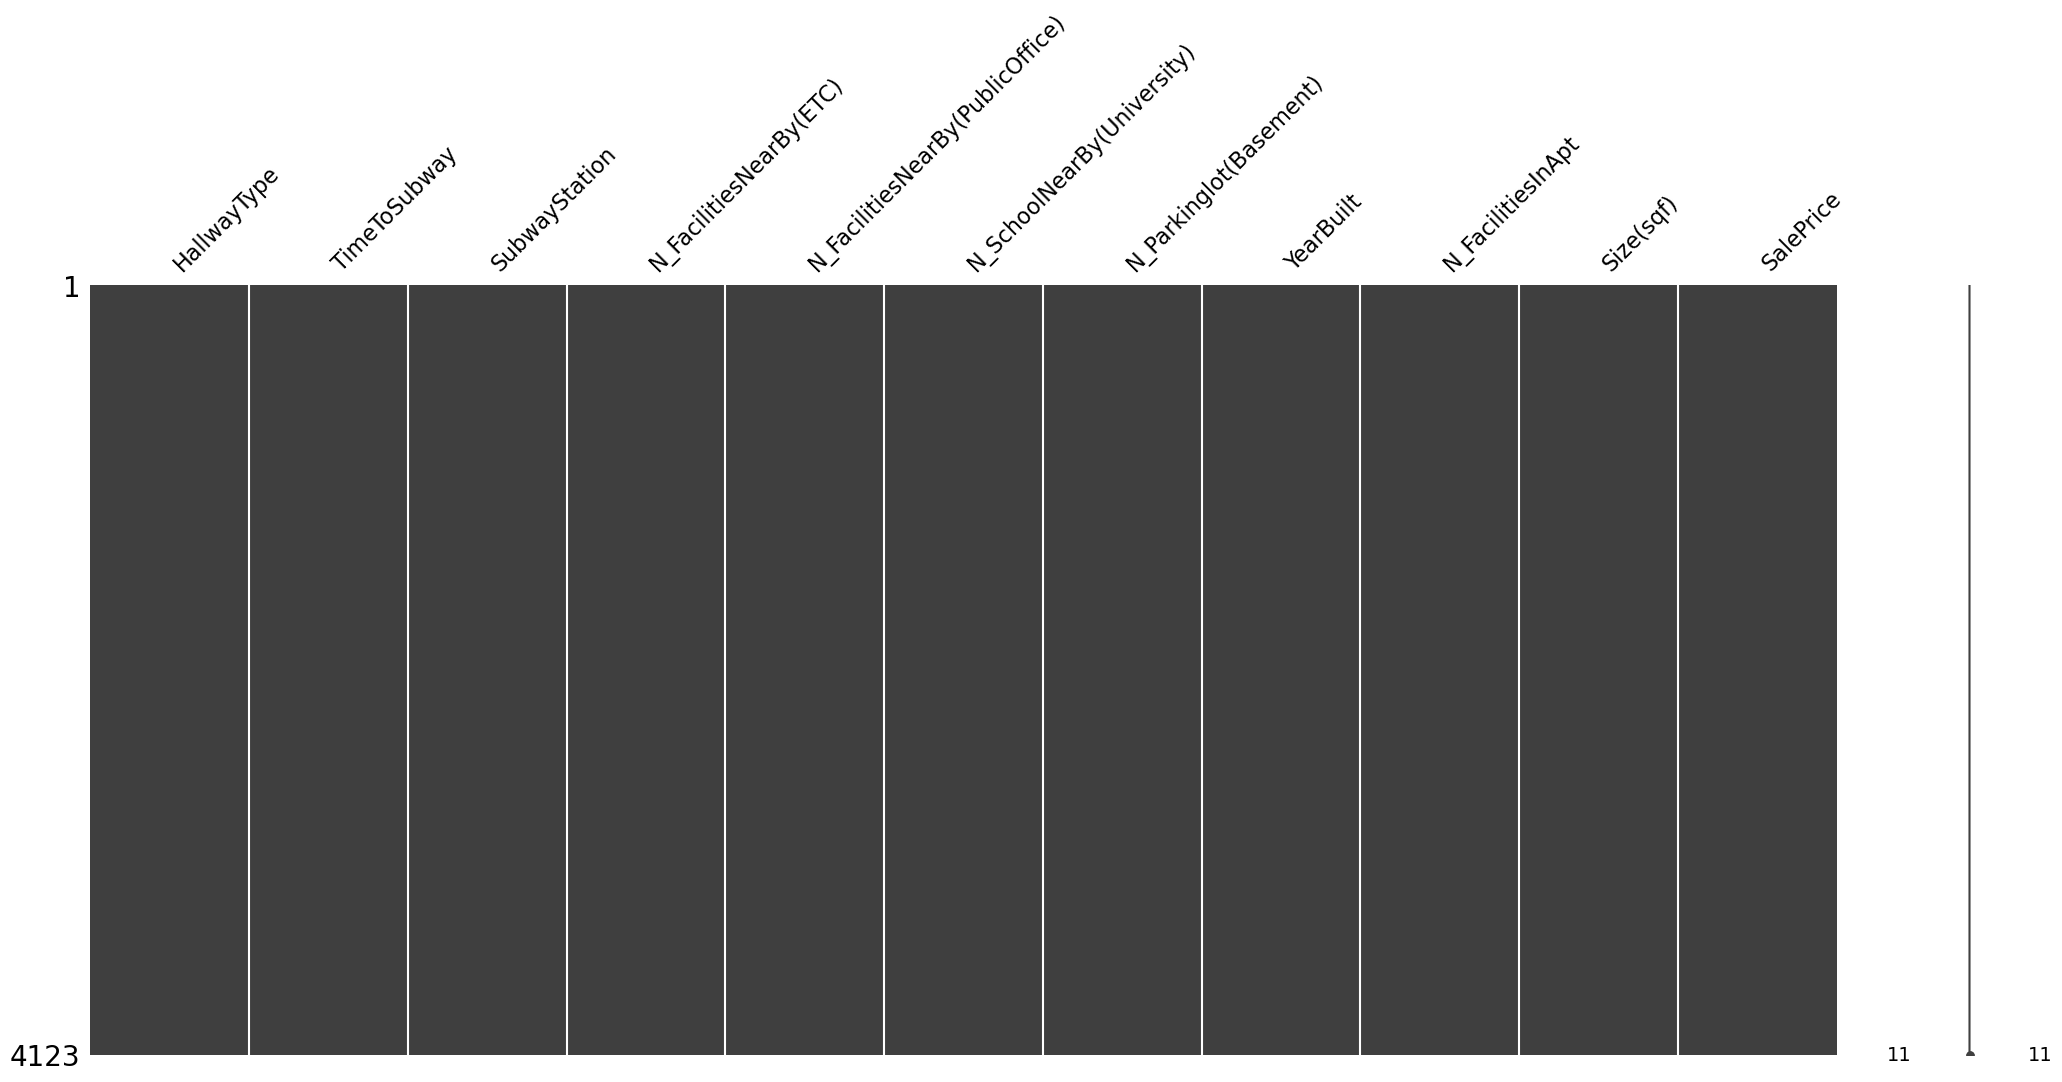

In [30]:
# Heatmap missing value

msno.matrix(df_model)

Karena tidak terdapat data kosong pada seluruh kolom dataset maka tidak perlu dilakukan penangan khusus pada missing value.

**Check Duplicate**

In [31]:
# Menghitung data duplikat

print(f'Jumlah data duplikat adalah: {df_model.duplicated().sum()}')

Jumlah data duplikat adalah: 1422


In [32]:
# Mengekstrak data duplikat

df_model.loc[df_model.duplicated(), :]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637
133,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min-10min,Daegu,0,3,2,400,2015,7,644,300884
4114,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,355,86725
4115,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141


In [33]:
# Persentase data duplikat

print('Persentase data duplikat:',len(df_model[df_model.duplicated()])/len(df_model))

Persentase data duplikat: 0.3448944943002668


Karena tidak terdapat kolom unik yang dapat menjadi identitas maka data yang memiliki nilai sama di setiap kolomnya dapat disebut sebagai data duplikat. Terdapat 1422 data duplikat pada dataset dan persentase data duplikat mencapat 34,49%. Duplikat data pada dataset machine learning dapat menyebabkan bias pada model sehingga menyebabkan overfitting karena titik data yang sama dapat dihitung beberapa kali. Oleh karena itu kita akan mendrop seluruh data duplikat.

In [34]:
# Drop data duplikat

df_model.drop_duplicates(inplace=True)

# Total data duplikat setelah didrop

print('Jumlah data duplikat sekarang:', df_model.duplicated().sum())

Jumlah data duplikat sekarang: 0


In [35]:
# Jumlah baris dan kolom setelah data duplikat didrop

df_model.shape

(2701, 11)

Setelah data duplikat didrop, kini sudah tidak terdapat data duplikat lagi dan tersisa 2.701 data dari yang sebelumnya memiliki 4.123 data.

**Drop Unrelevant Data**

Kita perlu melakukan pengecekan pada setiap feature untuk melihat apakah terdapat feature yang tidak relevan dengan permasalahan yang sedang dihadapi berdasarkan domain knowledge.

In [36]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


Semua feature pada dataset sudah dirasa relevan dengan permasalahan yang sedang dihadapi yaitu membangun sebuah model yang dapat memprediksi harga jual apartment yang sesuai dengan harga pasar berdasarkan berbagai faktor baik eksternal maupun internal yang dapat menentukan harga jual apartment. Selain itu semua feature juga ada sebelum melakukan prediksi harga apartment. Oleh karena itu tidak akan ada kolom yang didrop.

**Outlier**

Outlier merupakan titik data yang berbeda secara signifikan dibandingkan sebagian besar data. Secara umum, outlier dapat memiliki dampak yang signifikan pada model regresi dan dapat mendistorsi prediksi pada outlier. Maka dari itu, penting untuk menyelidiki outlier dan mempertimbangkan apakah outlier yang ada merupakan titik data valid yang harus disertakan dalam analisis dan mempertimbangkan metode alternatif untuk menangani outlier sebelum memutuskan untuk mengeluarkannya dari analisis.

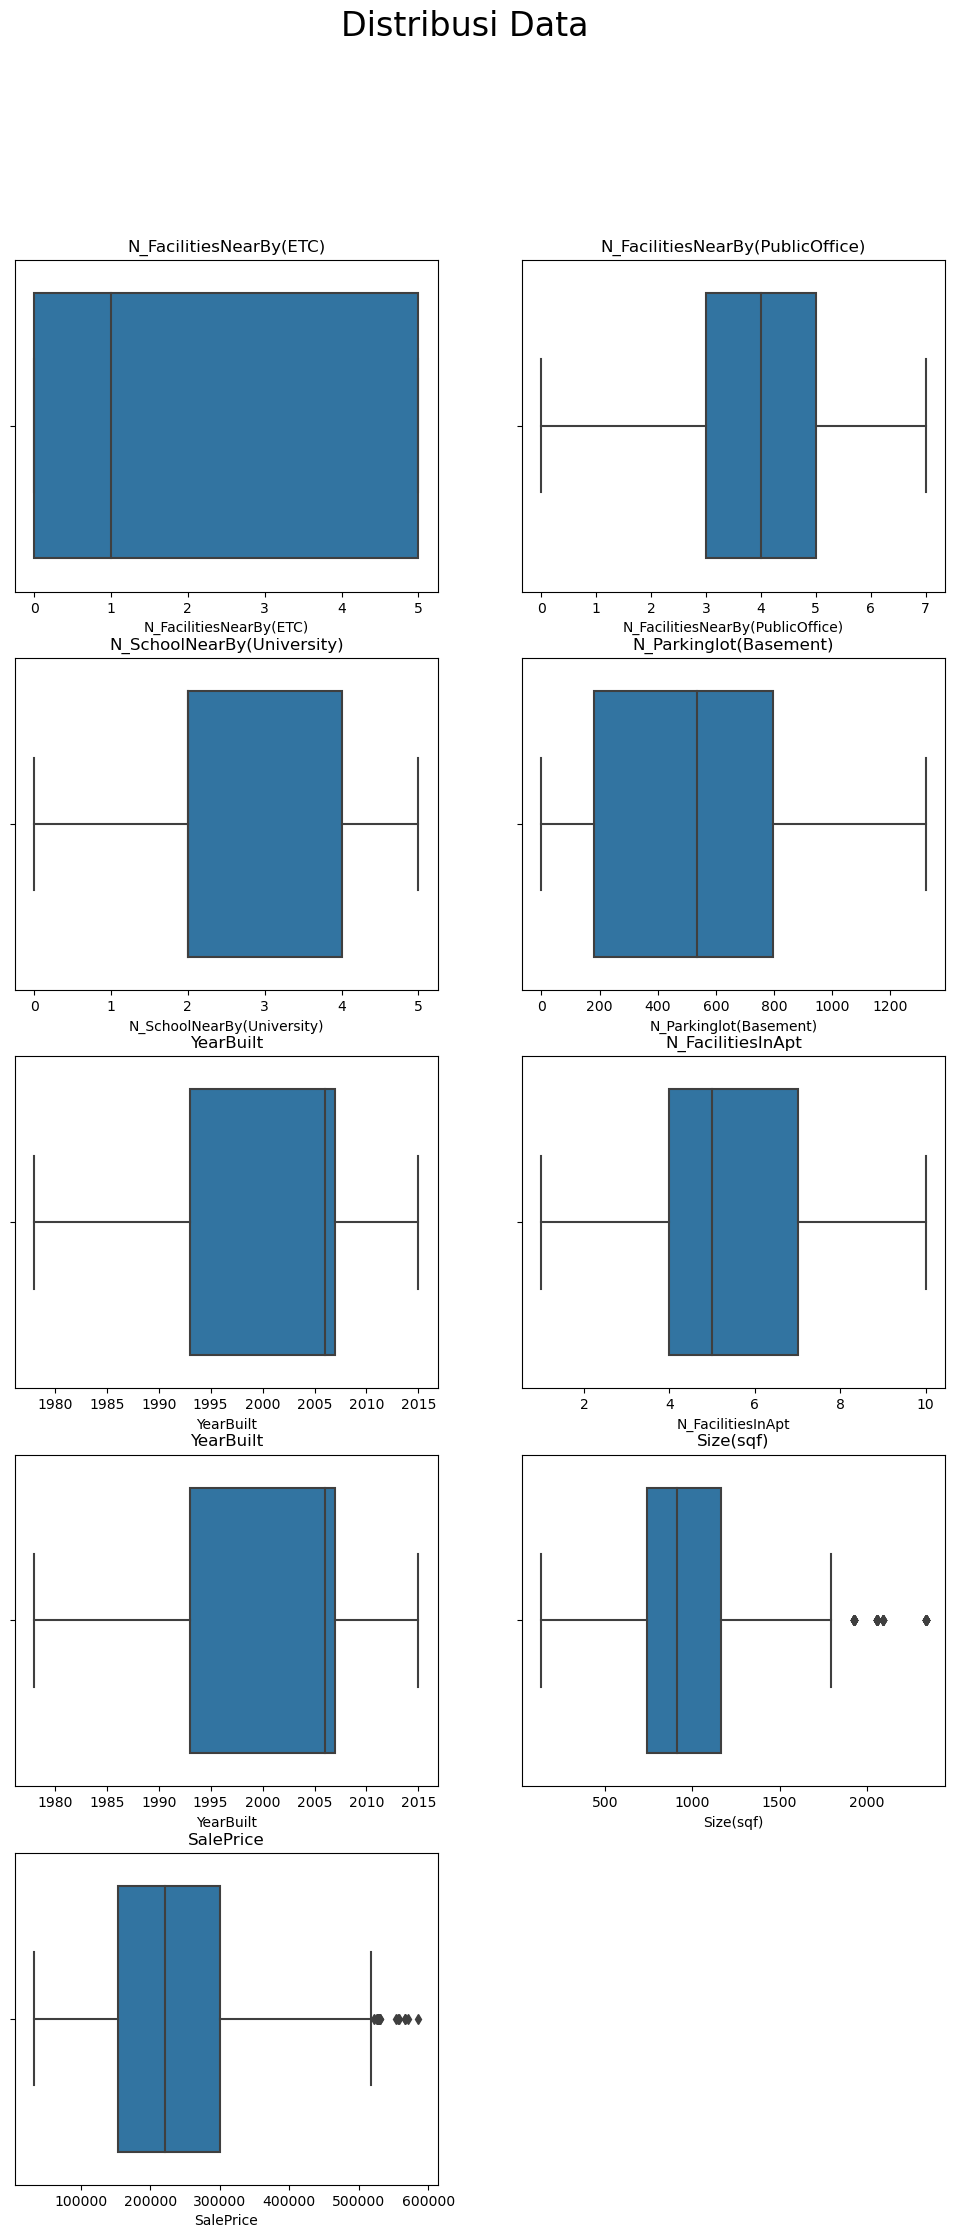

In [37]:
# Boxplot untuk mengecek outlier 

plt.figure(figsize=(12,25))

columns=['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','YearBuilt','N_FacilitiesInApt','YearBuilt','Size(sqf)','SalePrice']

plotnumber=1
for kolom in columns:
    plt.subplot(5,2,plotnumber)
    sns.boxplot(data=df_model,x=kolom)
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Distribusi Data',size=24)
plt.show()

In [38]:
# Deteksi outlier

def detect_outliers(df_model):
    outliers = {}
    for col in df_model.columns:
        if df_model[col].dtype in ['int64', 'float64']:
            Q1 = df_model[col].quantile(0.25)
            Q3 = df_model[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            outliers[col] = len(df_model[(df_model[col]<lower_bound) | (df_model[col]>upper_bound)])
    return outliers
outliers = detect_outliers(df_model)
for col, count in outliers.items():
    print(f'Column: {col}, Outliers total: {count}')

Column: N_FacilitiesNearBy(ETC), Outliers total: 0
Column: N_FacilitiesNearBy(PublicOffice), Outliers total: 0
Column: N_SchoolNearBy(University), Outliers total: 0
Column: N_Parkinglot(Basement), Outliers total: 0
Column: YearBuilt, Outliers total: 0
Column: N_FacilitiesInApt, Outliers total: 0
Column: Size(sqf), Outliers total: 84
Column: SalePrice, Outliers total: 17


Berdasarkan boxplot, feature yang memiliki outlier adalah feature Size(sqf) atau ukuran apartment dan feature SalePrice atau harga apartment. Feature ukuran apartment memiliki total 84 outlier sedangkan feature harga apartment memiliki 17 outlier.

Sekarang kita akan melihat deskriptif statistik dan distribusi dari feature ukuran apartment dan harga apartment untuk menentukan pendekatan yang tepat untuk mengatasi outlier dalam model regresi.

In [39]:
# Function untuk melakukan pengecekan outlier

def outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3-Q1
    print(f'''
    IQR: {Q3-Q1}
    Lower bound: {Q1-(1.5*IQR)}
    Upper bound: {Q3+(1.5*IQR)}
    ''')

# Outlier pada feature ukuran apartment

print('Ukuran apartment')
outlier(df_model['Size(sqf)'])

# Outlier pada feature harga apartment

print('Harga apartment')
outlier(df_model['SalePrice'])

Ukuran apartment

    IQR: 424.0
    Lower bound: 107.0
    Upper bound: 1803.0
    
Harga apartment

    IQR: 147345.0
    Lower bound: -67478.5
    Upper bound: 521901.5
    


In [40]:
# Deskiptif statistik feature ukuran apartment

print('Deskriptif Statistik Ukuran Apartment')
display(df_model['Size(sqf)'].describe())

# Deskiptif statistik feature harga apartment

print('Deskriptif Statistik Harga Apartment')
display(df_model['SalePrice'].describe())

Deskriptif Statistik Ukuran Apartment


count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

Deskriptif Statistik Harga Apartment


count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [41]:
# Check jumlah data yang melebihi batas atas pada feature ukuran apartment

print('Jumlah outlier pada feature ukuran apartment:', df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)'])

# Check jumlah data yang melebihi batas atas pada feature harga apartment

print('Jumlah outlier pada feature harga apartment:', df_model[df_model['SalePrice'] > 521901.0].count()['SalePrice'])

Jumlah outlier pada feature ukuran apartment: 84
Jumlah outlier pada feature harga apartment: 17


Jika outlier adalah titik data asli dan valid, menghapus outlier dapat menyebabkan hilangnya informasi penting dan dapat memengaruhi akurasi model secara keseluruhan. Sedangkan jika outlier disebabkan oleh kesalahan pengukuran atau faktor lain yang tidak mencerminkan hubungan antara variabel dependen dan independen, maka menghapus outlier mungkin diperlukan.

Berdasarkan tabel statistik deskriptif, walaupun pada feature ukuran apartment dan harga apartment terdapat outlier, kita tidak akan mendrop outlier karena outlier tidak disebabkan oleh data yang salah dimasukkan atau data yang salah diukur. Menurut domain knowledge, outlier yang ada memang merepresentasikan variasi data yang normal terjadi seperti ukuran rumah yang sangat luas dan harga rumah yang sangat mahal.

**Correlation**

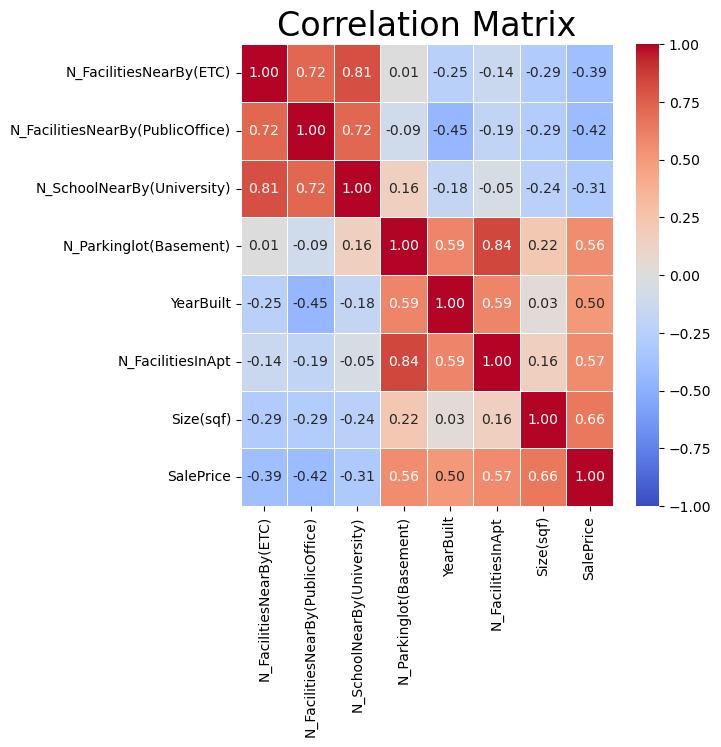

In [42]:
# Correlation Matrix

plt.figure(figsize=(6, 6))
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix',size=24)
plt.show()

1. Secara keseluruhan, correlation matrix menunjukkan bahwa semua feature memiliki korelasi medium (nilai korelasi 0,3 hingga 0,7) dengan harga apartment dan artinya semua feature memiliki hubungan atau keterkaitan dengan harga apartment. Korelasi paling tinggi dimiliki oleh ukuran apartment yang memiliki hubungan korelasi positif medium sehingga artinya ukuran apartment merupakan feature yang paling berkaitan dengan harga apartment dan semakin luas apartment maka akan semakin mahal harga apartment tersebut.
2. Feature lainnya yang juga memiliki hubungan korelasi positif medium dengan harga apartment adalah jumlah fasilitas di apartment, tahun pembangunan, dan jumlah tempat parkir basement. Hal ini menunjukkan bahwa semakin banyak jumlah fasilitas di apartment, semakin baru apartment, dan semakin banyak jumlah tempat parkir basement maka akan semakin mahal harga apartment tersebut.
3. Feature yang memiliki hubungan korelasi negatif medium dengan harga apartment adalah jumlah fasilitas kantor publik terdekat dari apartment, jumlah fasilitas terdekat lainnya dari apartment, dan jumlah universitas terdekat dari apartment. Hal ini menunjukkan bahwa semakin banyak jumlah fasilitas kantor publik, fasilitas lainnya, dan universitas di dekat apartment maka akan semakin murah harga apartment tersebut.
4. Terlihat hubungan korelasi kuat diantara variabel independen yaitu jumlah fasilitas terdekat lainnya dari apartment dengan jumlah universitas terdekat dari apartment (nilai korelasi=0,81) dan fasilitas terdekat lainnya dari apartment dengan jumlah fasilitas kantor publik terdekat dari apartment (nilai korelasi=0,72). Hal ini menunjukkan adanya multikolinearitas dimana dua atau lebih variabel independen dalam model memiliki korelasi yang tinggi satu sama lain dan dapat menyebabkan masalah dalam analisis regresi yang menggunakan metode least square untuk mengestimasi parameter regresi seperti regresi linear atau regresi logistik karena dapat mempengaruhi interpretasi koefisien regresi dan membuat estimasi yang tidak stabil.

**Clean Data**

In [43]:
# Check 5 data pertama clean data

df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [44]:
# Check tipe data, jumlah data kosong, jumlah data unik, dan sampel data unik pada setiap feature

listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Banwoldang, Myung-duk]"
3,N_FacilitiesNearBy(ETC),int64,0,0.0,4,"[2, 0]"
4,N_FacilitiesNearBy(PublicOffice),int64,0,0.0,8,"[6, 5]"
5,N_SchoolNearBy(University),int64,0,0.0,6,"[3, 1]"
6,N_Parkinglot(Basement),int64,0,0.0,20,"[400, 56]"
7,YearBuilt,int64,0,0.0,16,"[1992, 2015]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[2, 10]"
9,Size(sqf),int64,0,0.0,89,"[910, 1256]"


In [45]:
# Check informasi clean data

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [46]:
print('Data sebelum dibersihkan:', df.shape)
print('Data setelah dibersihkan:',df_model.shape)

Data sebelum dibersihkan: (4123, 11)
Data setelah dibersihkan: (2701, 11)


Setelah dibersihkan, dataset yang pada awalnya berjumlah 4.123 kini tersisa 2.701 data. Dataset yang sudah bersih selanjutnya sudah dapat digunakan untuk membuat model regresi.

# Modeling

**Feature Selection**

In [47]:
# Check nama variable independent untuk modeling

df_model.drop(columns='SalePrice').columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

1. Semua kolom pada dataset yaitu tipe apartment, waktu yang dibutuhkan untuk mencapai stasiun subway terdekat, stasiun subway terdekat, jumlah fasilitas lainnya terdekat, jumlah kantor publik terdekat, jumlah universitas terdekat, jumlah tempat parkir basement, tahun pembangunan apartment, jumlah fasilitas apartment, dan ukuran apartment akan digunakan dalam membangun model karena menurut domain knowledge, semua feature dapat mempengaruhi harga apartment.
2. Selain itu, hasil korelasi juga menunjukkan bahwa semua feature memiliki korelasi medium (nilai korelasi 0,3 hingga 0,7) dengan harga apartment yang artinya semua feature memiliki hubungan atau keterkaitan dengan harga apartment dan sudah dipastikan bahwa semua feature muncul sebelum label yaitu harga apartment sehingga semua feature bisa digunakan untuk melakukan prediksi harga apartment di Daegu, Korea Selatan.

**Feature Engineering**

In [48]:
# Menghitung jumlah data unik per feature

df_model.nunique()

HallwayType                           3
TimeToSubway                          5
SubwayStation                         8
N_FacilitiesNearBy(ETC)               4
N_FacilitiesNearBy(PublicOffice)      8
N_SchoolNearBy(University)            6
N_Parkinglot(Basement)               20
YearBuilt                            16
N_FacilitiesInApt                     9
Size(sqf)                            89
SalePrice                           838
dtype: int64

**Scaling**

Scaling adalah proses transformasi data numerik dalam suatu dataset agar nilainya berada dalam rentang tertentu dengan tujuan untuk memperbaiki konsistensi antara variabel yang memiliki unit atau rentang yang berbeda sehingga variabel-variabel tersebut dapat dibandingkan secara adil. Dalam konteks machine learning, scaling sering digunakan pada algoritma yang sensitif terhadap perbedaan skala data seperti algoritma regresi. Scaling juga dapat membantu mengoptimalkan kinerja algoritma, mengurangi waktu komputasi, dan meningkatkan interpretabilitas model.

Dalam dataset terdapat feature yang memiliki rentang yang jauh berbeda yaitu feature N_Parkinglot(Basement) dan Size(Sqf). Maka kita akan melakukan Robust Scaler pada feature N_Parkinglot(Basement) dan Size(sqf) karena metode ini dapat memperbaiki konsistensi data yang memiliki nilai outliers dan distribusi data yang skewed sehingga mengurangi pengaruh nilai-nilai ekstrim pada hasil analisis.

**Encoding**

Encoding adalah proses mengubah data dari satu format ke format lain, yang biasanya dilakukan pada data kategorikal agar menjadi data numerikal sebelum dapat digunakan untuk melatih model.

Dalam dataset terdapat beberapa feature yang merupakan data kategorikal sehingga kita perlu untuk melakukan encoding pada data kategorikal tersebut. Encoding yang akan dilakukan adalah sebagai berikut:

1. One-Hot Encoding: HallwayType, karena feature merupakan variabel nominal yang memiliki 3 kategori (kita menggunakan One-Hot Encoding dibandingkan Binary Encoding karena jumlah kategori tidak terlalu banyak)
2. Binary Encoding: SubwayStation, karena feature merupakan variabel nominal yang memiliki 8 kategori (kita menggunakan Binary Encoding dibandingkan One-Hot Encoding karena jumlah kategori cukup banyak sehingga kita ingin membuat variabel dummy yang lebih sedikit dan mengurangi overfitting yang terjadi jika variabel yang digunakan dalam membangun model semakin banyak)
3. Ordinal Encoding: TimeToSubway, karena feature merupakan variabel ordinal dan kategori pada feature memiliki urutan berdasarkan waktu yang dibutuhkan untuk menuju stasiun terdekat

In [49]:
# Scaling dan encoding

ordinal_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '0min-5min':1, '5min-10min':2, '10min-15min':3, '15-20min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
            ('Robust',RobustScaler(),['N_Parkinglot(Basement)','Size(sqf)']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

**Train Test Splitting**

Sebelumnya kita akan mendefinisikan variabel x dan y. Dalam pemodelan regresi, x merupakan variabel independen yang digunakan untuk memprediksi nilai y atau variabel dependen. Sementara itu y adalah variabel dependen atau variabel yang ingin diprediksi.

1. X = HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf)
2. Y = SalePrice

Data dipisah menjadi 2 bagian yaitu 80% untuk data training dan 20% untuk data testing. Data training digunakan untuk melatih model machine learning sedangkan data testing digunakan untuk menguji kinerja model yang telah dilatih.

In [50]:
# Split data

x=df_model.drop(['SalePrice'],axis=1)
y=df_model['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

**Benchmark Model**

Setelah dataset telah dipisahkan menjadi data training dan data testing, sekarang kita akan memilih benchmark model untuk menentukan model referensi yang akan digunakan sebagai dasar perbandingan untuk membandingkan kinerja model baru yang dikembangkan.

*Stand Alone Model*

Beberapa model regresi yang akan digunakan dalam pemilihan benchmark model adalah sebagai berikut:

1. Linear Regression: Model yang digunakan untuk memodelkan hubungan linier antara satu atau beberapa variabel input dan variabel target.
2. Lasso Regression: Model regresi linear yang digunakan untuk mengurangi overfitting dengan menambahkan jumlah absolut dari koefisien sebagai regularisasi pada persamaan regresi linier dimana beberapa koefisien diatur ke nol sehingga model hanya mempertimbangkan fitur-fitur paling penting.
3. Ridge Regression: Model regresi linear yang digunakan untuk mengurangi overfitting dengan menambahkan jumlah kuadrat dari koefisien sebagai regularisasi pada persamaan regresi linier.
4. KNN Regression: Model regresi berbasis algoritma K-Nearest Neighbors (KNN) dengan mencari K tetangga terdekat dari data input yang ingin diprediksi dan kemudian melakukan prediksi variabel target numerik.
5. Decision Tree Regression: Model regresi dalam bentuk struktur decision tree yang terdiri dari serangkaian node dan edge.
6. Random Forest Regression: Model regresi yang membangun beberapa decision tree secara acak dengan menggunakan subset data training yang berbeda-beda dan subset fitur yang acak dari dataset yang tersedia dan setiap decision tree dihasilkan dengan menggunakan teknik bootstrap sampling dan feature bagging.
7. XGBoost (Extreme Gradient Boosting) Regression: Model regresi yang memanfaatkan teknik gradient boosting dengan pendekatan ensemble learning.
8. Support Vector Regression(SVR): Model regresi yang digunakan untuk memprediksi nilai target berdasarkan fitur atau variabel independen yang diberikan dengan pendekatan yang mirip dengan Support Vector Machine (SVM) namun memiliki tujuan untuk menemukan hyperplane (garis atau bidang) terbaik yang dapat memisahkan data dalam ruang fitur.

K-fold cross validation juga digunakan sebagai metode evaluasi performa model yang dilakukan dengan membagi dataset menjadi 5 partisi yang sama besar lalu model akan dilatih pada 4 partisi dan diuji pada partisi yang tersisa. Prosedur ini akan dilakukan sebanyak 5 kali dengan partisi yang berbeda-beda sebagai data validasi dan data training sehingga akhirnya performa model akan dihitung berdasarkan rata-rata performa. Metode ini berguna untuk menghindari overfitting atau underfitting dan untuk mendapatkan generalisasi model yang lebih baik.

In [51]:
# Stand Alone Model

LinReg=LinearRegression()
lasso=Lasso(random_state=8)
ridge=Ridge(random_state=8)
knn=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()
svr=SVR()

models=[LinReg,lasso,ridge,knn,Tree,Forest,XGBoost,svr]

score_R2=[]
mean_R2=[]
std_R2=[]

score_RMSE=[]
mean_RMSE=[]
std_RMSE=[]

score_MAE=[]
mean_MAE=[]
std_MAE=[]

score_MAPE=[]
mean_MAPE=[]
std_MAPE=[]

kfold=KFold(n_splits=5)

for i in models:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',i)
    ])

    # R-Squared
    model_cv_R2=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='r2')
    score_R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_RMSE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
    score_MAE.append(model_cv_MAE)
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

In [52]:
# Hasil evaluasi

kfold=pd.DataFrame({
    'Model': ['Linear Regression','Lasso','Ridge','KNN','Decision Tree','Random Forest','XGBoost','SVR'],
    'Mean R2': mean_R2,
    'Standar Deviasi R2': std_R2,
    'Mean RMSE': mean_RMSE,
    'Standard Deviasi RMSE': std_RMSE,
    'Mean MAE': mean_MAE,
    'Standard Deviasi MAE': std_MAE,
    'Mean MAPE': mean_MAPE,
    'Standard Deviasi MAPE': std_MAPE
}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)

kfold

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Random Forest,0.800099,0.011443,-46886.208031,1317.605751,-37806.336434,1138.499990,-0.193504,0.006105
Decision Tree,0.798259,0.013279,-47087.515123,1300.498052,-37947.755779,1130.649391,-0.194256,0.005240
XGBoost,0.797535,0.011146,-47191.030367,1397.766177,-37968.766175,1157.432791,-0.194465,0.005768
KNN,0.774594,0.023109,-49723.325085,2220.330989,-39551.981667,1556.834268,-0.200127,0.004756
Linear Regression,0.747164,0.013894,-52745.035768,1878.070531,-42864.921834,1643.017092,-0.218745,0.006732
Lasso,0.747166,0.013898,-52744.730927,1878.451883,-42865.266868,1642.985130,-0.218753,0.006729
Ridge,0.747187,0.013932,-52742.456300,1881.144541,-42871.407887,1642.280859,-0.218889,0.006694
SVR,-0.010024,0.010113,-105486.981619,3389.768007,-85121.435816,2656.012734,-0.557795,0.034506


**Voting dan Stacking**

Selain itu, kita juga akan mencoba menggabungkan beberapa model regresi yang berbeda untuk meningkatkan kinerja prediksi. Dalam teknik ini, beberapa model regresi dilatih pada data training yang sama dan kemudian prediksi dari masing-masing model digabungkan untuk memberikan prediksi akhir.

Kita tidak akan menggunakan model SVR karena berdasarkan hasil evaluasi sebelumnya, model SVR memiliki nilai mean RMSE, MAE, dan MAPE yang jauh lebih besar dibandingkan model lainnya sehingga hal ini mengartikan bahwa kualitas prediksi model SVR kurang baik.

*Voting Regressor*

In [53]:
# Voting Regressor

LinReg=LinearRegression()
lasso=Lasso(random_state=8)
ridge=Ridge(random_state=8)
knn=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

vc=VotingRegressor([
  ('model1',LinReg),
  ('model2',lasso),
  ('model3',ridge),
  ('model4',knn),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
])

score_R2_voting=[]
mean_R2_voting=[]
std_R2_voting=[]

score_RMSE_voting=[]
mean_RMSE_voting=[]
std_RMSE_voting=[]

score_MAE_voting=[]
mean_MAE_voting=[]
std_MAE_voting=[]

score_MAPE_voting=[]
mean_MAPE_voting=[]
std_MAPE_voting=[]

kfold=KFold(n_splits=5)

model_pipeline3=Pipeline([
('preprocess',transformer),
('model',vc)
])

# R-Squared
model_cv_R2_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='r2')
score_R2_voting.append(model_cv_R2_voting)
mean_R2_voting.append(model_cv_R2_voting.mean())
std_R2_voting.append(model_cv_R2_voting.std())

# RMSE
model_cv_RMSE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_voting.append(model_cv_RMSE_voting)
mean_RMSE_voting.append(model_cv_RMSE_voting.mean())
std_RMSE_voting.append(model_cv_RMSE_voting.std())

# MAE
model_cv_MAE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_voting.append(model_cv_MAE_voting)
mean_MAE_voting.append(model_cv_MAE_voting.mean())
std_MAE_voting.append(model_cv_MAE_voting.std())

# MAPE
model_cv_MAPE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_voting.append(model_cv_MAPE_voting)
mean_MAPE_voting.append(model_cv_MAPE_voting.mean())
std_MAPE_voting.append(model_cv_MAPE_voting.std())

In [54]:
# Hasil evaluasi voting

kfold_voting=pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Mean R2': mean_R2_voting,
    'Standar Deviasi R2': std_R2_voting,
    'Mean RMSE': mean_RMSE_voting,
    'Standard Deviasi RMSE': std_RMSE_voting,
    'Mean MAE': mean_MAE_voting,
    'Standard Deviasi MAE': std_MAE_voting,
    'Mean MAPE': mean_MAPE_voting,
    'Standard Deviasi MAPE': std_MAPE_voting
}).set_index('Model')

kfold_voting

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Voting Regressor,0.793315,0.013152,-47672.170374,1553.045927,-38956.862164,1086.188637,-0.199363,0.005449


*Stacking Regressor*

In [55]:
# Stacking Regressor

LinReg=LinearRegression()
lasso=Lasso(random_state=8)
ridge=Ridge(random_state=8)
knn=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

sc=StackingRegressor([
  ('model1',LinReg),
  ('model2',lasso),
  ('model3',ridge),
  ('model4',knn),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
],final_estimator=XGBoost)

score_R2_stacking=[]
mean_R2_stacking=[]
std_R2_stacking=[]

score_RMSE_stacking=[]
mean_RMSE_stacking=[]
std_RMSE_stacking=[]

score_MAE_stacking=[]
mean_MAE_stacking=[]
std_MAE_stacking=[]

score_MAPE_stacking=[]
mean_MAPE_stacking=[]
std_MAPE_stacking=[]

kfold=KFold(n_splits=5)

model_pipeline4=Pipeline([
('preprocess',transformer),
('model',sc)
])

# R-Squared
model_cv_R2_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='r2')
score_R2_stacking.append(model_cv_R2_stacking)
mean_R2_stacking.append(model_cv_R2_stacking.mean())
std_R2_stacking.append(model_cv_R2_stacking.std())

# RMSE
model_cv_RMSE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_stacking.append(model_cv_RMSE_stacking)
mean_RMSE_stacking.append(model_cv_RMSE_stacking.mean())
std_RMSE_stacking.append(model_cv_RMSE_stacking.std())

# MAE
model_cv_MAE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_stacking.append(model_cv_MAE_stacking)
mean_MAE_stacking.append(model_cv_MAE_stacking.mean())
std_MAE_stacking.append(model_cv_MAE_stacking.std())

# MAPE
model_cv_MAPE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_stacking.append(model_cv_MAPE_stacking)
mean_MAPE_stacking.append(model_cv_MAPE_stacking.mean())
std_MAPE_stacking.append(model_cv_MAPE_stacking.std())

In [56]:
# Hasil evaluasi stacking

kfold_stacking=pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Mean R2': mean_R2_stacking,
    'Standar Deviasi R2': std_R2_stacking,
    'Mean RMSE': mean_RMSE_stacking,
    'Standard Deviasi RMSE': std_RMSE_stacking,
    'Mean MAE': mean_MAE_stacking,
    'Standard Deviasi MAE': std_MAE_stacking,
    'Mean MAPE': mean_MAPE_stacking,
    'Standard Deviasi MAPE': std_MAPE_stacking
}).set_index('Model')

kfold_stacking

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Stacking Regressor,0.784351,0.011867,-48724.011741,2005.176835,-38959.723537,1761.810809,-0.199858,0.007545


**Summary**

Berikut adalah rangkuman hasil evaluasi dari seluruh model yang digunakan:

In [57]:
# Rangkuman hasil evaluasi seluruh model

summary=pd.DataFrame({
        'Model':['Linear Regression','Lasso Regression','Ridge Regression','KNN Regressor','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor','SVR','Voting Regressor','Stacking Regressor'],
        'Mean R2': mean_R2+mean_R2_voting+mean_R2_stacking,
        'Standar Deviasi R2': std_R2+std_R2_voting+std_R2_stacking,
        'Mean RMSE': mean_RMSE+mean_RMSE_voting+mean_RMSE_stacking,
        'Standard Deviasi RMSE':  std_RMSE+std_RMSE_voting+std_RMSE_stacking,
        'Mean MAE': mean_MAE+mean_MAE_voting+mean_MAE_stacking,
        'Standard Deviasi MAE':  std_MAE+std_MAE_voting+std_MAE_stacking,
        'Mean MAPE': mean_MAPE+mean_MAPE_voting+mean_MAPE_stacking,
        'Standard Deviasi MAPE':  std_MAPE+std_MAPE_voting+std_MAPE_stacking}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)
summary

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Random Forest Regressor,0.800099,0.011443,-46886.208031,1317.605751,-37806.336434,1138.499990,-0.193504,0.006105
Decision Tree Regressor,0.798259,0.013279,-47087.515123,1300.498052,-37947.755779,1130.649391,-0.194256,0.005240
XGBoost Regressor,0.797535,0.011146,-47191.030367,1397.766177,-37968.766175,1157.432791,-0.194465,0.005768
Voting Regressor,0.793315,0.013152,-47672.170374,1553.045927,-38956.862164,1086.188637,-0.199363,0.005449
Stacking Regressor,0.784351,0.011867,-48724.011741,2005.176835,-38959.723537,1761.810809,-0.199858,0.007545
KNN Regressor,0.774594,0.023109,-49723.325085,2220.330989,-39551.981667,1556.834268,-0.200127,0.004756
Linear Regression,0.747164,0.013894,-52745.035768,1878.070531,-42864.921834,1643.017092,-0.218745,0.006732
Lasso Regression,0.747166,0.013898,-52744.730927,1878.451883,-42865.266868,1642.985130,-0.218753,0.006729
Ridge Regression,0.747187,0.013932,-52742.456300,1881.144541,-42871.407887,1642.280859,-0.218889,0.006694


Berdasarkan hasil evaluasi di atas, model Random Forest Regressor, Decision Tree Regressor, XGBoost Regressor, dan Voting Regressor memiliki nilai mean RMSE, mean MAE, dan mean MAPE yang terkecil dibandingkan model lainnya dimana Random Forest Regressor merupakan model yang terbaik. Semakin kecil nilai RMSE, MAE,dan MAPE menunjukkan bahwa semakin baik kualitas prediksi model. Selain itu nilai standard deviasi dari RMSE, MAE, dan MAPE juga relatif kecil sehingga menunjukka bahwa hasil konsisten.

Maka Random Forest Regressor, Decision Tree Regressor, XGBoost Regressor, dan Voting Regressor merupakan benchmark 4 model terbaik dan akan dilakukan prediksi pada data testing.

**Prediksi ke Data Testing dengan Benchmark 4 Model Terbaik**

In [58]:
# Benchmark 4 model terbaik

LinReg=LinearRegression()
lasso=Lasso(random_state=8)
ridge=Ridge(random_state=8)
knn=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

models={
    'Random Forest':RandomForestRegressor(random_state=8),
    'Decision Tree':DecisionTreeRegressor(random_state=8),
    'XGBoost':xgb.XGBRegressor(),
    'Voting Regression':VotingRegressor([('model1',LinReg),('model2',lasso),('model3',ridge),('model4',knn),('model5',Tree),('model6',Forest),('model7',XGBoost)])
}

score_R2=[]
score_RMSE=[]
score_MAE=[]
score_MAPE=[]

for i in models:
    model=Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    score_R2.append(r2_score(y_test, y_pred))
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAE.append(mean_absolute_error(y_test, y_pred))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning=pd.DataFrame({'R2':score_R2,'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index=models.keys()).sort_values(by='MAPE')

score_before_tuning

,R2,RMSE,MAE,MAPE
Decision Tree,0.813620,45190.336877,36691.559723,0.189233
XGBoost,0.813523,45202.047489,36709.822024,0.189525
Random Forest,0.812731,45297.907094,36726.965487,0.190773
Voting Regression,0.808860,45763.667426,37498.779851,0.196376


Setelah dilakukan prediksi pada data testing, model Decision Tree Regressor merupakan model terbaik karena memiliki nilai mean RMSE, mean MAE, dan mean MAPE yang terkecil dibandingkan model lainnya.

**Hyperparameter Tuning**

Sekarang kita akan melakukan hyperparameter tuning untuk mencari kombinasi parameter terbaik pada sebuah model machine learning dengan tujuan meningkatkan performa dan akurasi dari model tersebut. Berdasarkan metrics yang digunakan, model Random Forest Regression merupakan model yang memiliki performa terbaik pada saat melakukan cross validation sedangkan model Decision Tree Regression merupakan model yang memiliki performa terbaik pada saat melakukan prediksi pada data testing.

Oleh karena itu, kita akan melakukan hyperparameter tuning pada kedua model yaitu model Random Forest Regressor dan Decision Tree Regressor untuk dapat meningkatkan performa model dan pada akhirnya memilih model final yang terbaik.

*Model Random Forest Regressor*

Random Forest merupakan metode ensemble yang menggabungkan model machine learning Decision Tree dengan karakteristik data yang berbeda yang memiliki tujuan untuk memperkecil ragam nilai prediksi dan membuat hasil prediksi menjadi lebih stabil dimana hasil prediksi akhir didapatkan dari majority vote. Pada Random Forest kita memilih secara acak kandidat fitur yang akan digunakan dalam setiap splitting tree.

Berikut adalah parameter yang akan digunakan pada saat melakukan hyperparameter tuning model Random Forest:

1. n_estimators: Jumlah decision tree yang dibangun di dalam random forest.
Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 1000.

2. criterion: Fungsi untuk mengukur kualitas split. Kriteria yang umumnya digunakan untuk regresi adalah MSE, MAE, Friedman MSE, dan Poisson.
max_depth: Kedalaman maksimum dari setiap decision tree dalam random forest. Semakin dalam decision tree maka semakin besar kemungkinan overfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 50.

3. max_features: Jumlah maksimum fitur yang digunakan dalam setiap decision tree untuk membagi sebuah node. Semakin sedikit fitur yang digunakan maka akan mengurangi kemungkinan overfitting.
4. min_samples_split: Jumlah minimum data point yang diperlukan untuk membagi sebuah node. Semakin besar nilai min_samples_split maka semakin sedikit pembagian node sehingga mengurangi kemungkinan overfitting namun jika nilainya terlalu besar maka semakin dapat menyebabkan underfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 2 sampai 20.

5. min_samples_leaf: Jumlah minimum sampel yang dibutuhkan pada setiap leaf di dalam decision tree. Semakin besar nilai min_samples_leaf maka akan semakin sedikit node yang dihasilkan dan dapat mengurangi kemungkinan overfitting namun jika nilainya terlalu besar dapat menyebabkan underfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 20.

In [59]:
# Hyperparameter Random Forest

hyperparam_forest={
        'modeling__n_estimators': list(np.arange(1,1001)),
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

Randomized search merupakan sebuah metode untuk melakukan penelusuran terhadap kombinasi hyperparameter pada model secara acak. Setelah hyperparameter yang tepat ditemukan, maka model dapat dilatih ulang dengan hyperparameter yang telah dioptimalkan tersebut.

Kita akan menggunakan randomized search dibandingkan grid search karena randomized search lebih efektif untuk mengurangi waktu yang dibutuhkan untuk menemukan hyperparameter yang tepat.

In [60]:
# Algoritma (benchmark model)

Forest=RandomForestRegressor(random_state=8)

pipe_model_forest = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Forest)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_forest=RandomizedSearchCV(
        estimator=pipe_model_forest,              # Model yang hendak di tuning
        param_distributions=hyperparam_forest,    # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Memaksimalkan processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [61]:
# Fit model dengan hyperparameter tuning pada data training

randomsearch_forest.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/si

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('Binary

In [62]:
# Hasil hyperparamer tuning dalam bentuk dataframe yang diurutkan berdasarkan MAPE

pd.DataFrame(randomsearch_forest.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
1,3.228176,0.083127,0.238390,0.005136,954,17,2,sqrt,None,squared_error,...,1079.507386,1,-0.188826,-0.204805,-0.192690,-0.200824,-0.187507,-0.194930,0.006777,3
7,1.776251,0.017747,0.120654,0.002249,454,19,1,log2,None,poisson,...,1099.545970,4,-0.187388,-0.211523,-0.195744,-0.205142,-0.194375,-0.198834,0.008500,4
2,0.583728,0.015842,0.058549,0.001915,166,15,14,log2,None,friedman_mse,...,996.439995,5,-0.193398,-0.219481,-0.207469,-0.210642,-0.198470,-0.205892,0.009175,5
6,18.096128,0.095439,0.138002,0.007337,584,12,8,sqrt,None,absolute_error,...,1331.087055,2,-0.183953,-0.203074,-0.187156,-0.195824,-0.181612,-0.190324,0.007992,1
9,76.318556,14.357705,0.149145,0.040179,893,20,19,auto,None,absolute_error,...,1164.065481,3,-0.188313,-0.204790,-0.193437,-0.197528,-0.183995,-0.193612,0.007224,2
3,2.521513,0.044879,0.095233,0.004126,331,20,9,auto,None,poisson,...,1569.381718,6,-0.192762,-0.224118,-0.202740,-0.211064,-0.205163,-0.207169,0.010331,6
0,0.488255,0.002384,0.000000,0.000000,556,20,8,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.338706,0.011816,0.000000,0.000000,372,10,13,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.628225,0.026362,0.000000,0.000000,809,16,11,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.581893,0.014957,0.000000,0.000000,734,13,17,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",squared_error,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [63]:
# Parameter terbaik 

print('Parameter terbaik:')
randomsearch_forest.best_params_

Parameter terbaik:


{'modeling__n_estimators': 584,
 'modeling__min_samples_split': 12,
 'modeling__min_samples_leaf': 8,
 'modeling__max_features': 'sqrt',
 'modeling__max_depth': None,
 'modeling__criterion': 'absolute_error'}

In [64]:
# Best score 

print(f'Nilai MAPE setelah hyperparameter tuning: {randomsearch_forest.best_score_}')

Nilai MAPE setelah hyperparameter tuning: -0.19032368120796808


*Prediksi ke Data Testing dengan Model Random Forest yang Telah Di-tuning*

Sekarang kita akan melakukan prediksi ke data testing dengan menggunakan model Random Forest yang sudah dilakukan hyperparameter tuning untuk menguji performa model.

In [65]:
model = {'Random Forest': RandomForestRegressor(random_state=8)}

# Define model terhadap estimator terbaik
forest_tuning = randomsearch_forest.best_estimator_

# Fitting model
forest_tuning.fit(x_train, y_train)

# Prediksi ke data testing
y_pred_forest_tuning = forest_tuning.predict(x_test)

nilai_R2_forest_tuning=r2_score(y_test, y_pred_forest_tuning)
nilai_RMSE_forest_tuning=np.sqrt(mean_squared_error(y_test, y_pred_forest_tuning))
nilai_MAE_forest_tuning=mean_absolute_error(y_test, y_pred_forest_tuning)
nilai_MAPE_forest_tuning=mean_absolute_percentage_error(y_test, y_pred_forest_tuning)

score_after_tuning_forest=pd.DataFrame({'R2': nilai_R2_forest_tuning, 'RMSE': nilai_RMSE_forest_tuning, 'MAE': nilai_MAE_forest_tuning, 'MAPE': nilai_MAPE_forest_tuning}, index=model.keys())
score_after_tuning_forest

,R2,RMSE,MAE,MAPE
Random Forest,0.791238,47826.803944,37106.277942,0.196933


*Perbanding Performa Model Random Forest Sebelum dan Setelah Hyperparameter Tuning*

In [66]:
# Sebelum hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['Random Forest']).T

,R2,RMSE,MAE,MAPE
Random Forest,0.812731,45297.907094,36726.965487,0.190773


In [67]:
# Setelah hyperparameter tuning

score_after_tuning_forest

,R2,RMSE,MAE,MAPE
Random Forest,0.791238,47826.803944,37106.277942,0.196933


Performa model Random Forest pada data testing setelah dilakukan hyperparameter tuning tidak menujukkan peningkatan karena nilai RMSE, MAE, dan MAPE mengalami peningkatan setelah dilakukan hyperparameter tuning. Hal tersebut menunjukkan bahwa semakin besar nilai kesalahan prediksi dan model tidak berhasil untuk membuat prediksi yang lebih akurat.

Oleh karena itu, kita sekarang akan mencoba untuk melakukan hyperparameter tuning pada model Decision Tree yang memiliki performa paling baik pada saat diprediksi ke data testing.

**Model Decision Tree Regressor**

Decision tree regressor merupakan algoritma machine learning yang menggunakan struktur pohon untuk membagi data menjadi kelompok yang semakin kecil dan homogen berdasarkan nilai fitur-fiturnya dan setiap node dalam tree memprediksi nilai rata-rata target dari kelompok data yang masuk ke dalam node tersebut.

Proses pembuatan Decision Tree Regressor dimulai dengan membagi data menjadi dua kelompok berdasarkan nilai fitur yang dipilih dan setiap kelompok dibagi menjadi dua kelompok lagi berdasarkan nilai fitur yang lain. Proses ini diulangi hingga tercapai kondisi berhenti yang ditentukan. Setelah tree selesai dibuat, proses prediksi dilakukan dengan melewati data melalui pohon dan memilih nilai rata-rata target dari node yang sesuai dengan nilai fitur-fiturnya.

Terdapat beberapa parameter model Decision Tree yang memiliki kesamaan dengan parameter model Random Forest karena pada dasarnya Random Forest merupakan kumpulan dari beberapa Decision Tree untuk menghasilkan prediksi yang lebih akurat dan stabil.

Berikut adalah parameter yang akan digunakan pada saat melakukan hyperparameter tuning model Decision Tree:

1. splitter: Strategi yang digunakan untuk membagi sebuah node. Strategi yang dapat digunakan adalah best untuk memilih split terbaik dan random untuk memilih split terbaik secara random.
2. criterion: Fungsi untuk mengukur kualitas split. Kriteria yang umumnya digunakan untuk regresi adalah MSE, MAE, Friedman MSE, dan Poisson.
3. max_depth: Kedalaman maksimum dari decision tree. Semakin dalam decision tree maka akan semakin kompleks model dan semakin besar kemungkinan overfitting.
4. max_features: Jumlah maksimum fitur yang digunakan dalam setiap decision tree untuk membagi sebuah node. Semakin sedikit fitur yang digunakan maka akan mengurangi kemungkinan overfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 50.

5. min_samples_split: Jumlah minimum data point yang diperlukan untuk membagi sebuah node. Semakin besar nilai min_samples_split maka semakin sedikit pembagian node sehingga mengurangi kemungkinan overfitting namun jika nilainya terlalu besar maka semakin dapat menyebabkan underfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 20.

6. min_samples_leaf: Jumlah minimum sampel yang dibutuhkan pada setiap leaf di dalam decision tree. Semakin besar nilai min_samples_leaf maka akan semakin sedikit node yang dihasilkan dan dapat mengurangi kemungkinan overfitting namun jika nilainya terlalu besar dapat menyebabkan underfitting.

Pada saat melakukan hyperparameter tuning, value yang akan digunakan adalah 1 sampai 20.

In [68]:
# Hyperparameter Decision Tree

hyperparam_tree={
        'modeling__splitter': ['best','random'],
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

In [69]:
# Algoritma (benchmark model)

Tree=DecisionTreeRegressor(random_state=8)

pipe_model_tree = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Tree)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_tree=RandomizedSearchCV(
        estimator=pipe_model_tree,                # Model yang hendak di tuning
        param_distributions=hyperparam_tree,      # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Memaksimalkan processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [70]:
# Fit model dengan hyperparameter tuning pada data training

randomsearch_tree.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pack

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('Binary

In [71]:
# Hasil hyperparamer tuning dalam bentuk dataframe yang diurutkan berdasarkan MAPE

pd.DataFrame(randomsearch_tree.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__splitter,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
5,0.297598,0.026852,0.024133,0.002689,best,6,5,None,None,absolute_error,...,1329.640574,1,-0.185902,-0.198583,-0.187712,-0.188369,-0.174179,-0.186949,0.007773,1
6,0.062567,0.010978,0.024605,0.003002,random,19,15,None,None,squared_error,...,1408.892464,2,-0.193823,-0.218609,-0.196589,-0.206065,-0.197410,-0.202499,0.009037,2
3,0.064211,0.001801,0.026425,0.002170,best,3,14,sqrt,None,squared_error,...,1373.711131,3,-0.193617,-0.214614,-0.198999,-0.214581,-0.200191,-0.204400,0.008616,3
0,0.145344,0.085009,0.027919,0.005122,random,14,20,sqrt,None,absolute_error,...,1580.118824,4,-0.205648,-0.232649,-0.216429,-0.216020,-0.209857,-0.216121,0.009189,4
1,0.153914,0.068902,0.000000,0.000000,random,14,5,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.081614,0.015626,0.000000,0.000000,random,9,18,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,0.062116,0.004531,0.000000,0.000000,random,3,5,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",squared_error,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.055123,0.001893,0.000000,0.000000,best,5,16,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.059811,0.007667,0.000000,0.000000,random,9,14,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",friedman_mse,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.056241,0.007320,0.000000,0.000000,random,12,13,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",friedman_mse,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [72]:
# Parameter terbaik 

print('Parameter terbaik:')
randomsearch_tree.best_params_

Parameter terbaik:


{'modeling__splitter': 'best',
 'modeling__min_samples_split': 6,
 'modeling__min_samples_leaf': 5,
 'modeling__max_features': None,
 'modeling__max_depth': None,
 'modeling__criterion': 'absolute_error'}

In [73]:
# Best score 

print(f'Nilai MAPE setelah hyperparameter tuning: {randomsearch_tree.best_score_}')

Nilai MAPE setelah hyperparameter tuning: -0.1869489678722512


In [74]:
model = {'Decision Tree': DecisionTreeRegressor(random_state=8)}

# Define model terhadap estimator terbaik
tree_tuning = randomsearch_tree.best_estimator_

# Fitting model
tree_tuning.fit(x_train, y_train)

# Prediksi ke data testing
y_pred_tree_tuning = tree_tuning.predict(x_test)

nilai_R2_tree_tuning=r2_score(y_test, y_pred_tree_tuning)
nilai_RMSE_tree_tuning=np.sqrt(mean_squared_error(y_test, y_pred_tree_tuning))
nilai_MAE_tree_tuning=mean_absolute_error(y_test, y_pred_tree_tuning)
nilai_MAPE_tree_tuning=mean_absolute_percentage_error(y_test, y_pred_tree_tuning)

score_after_tuning_tree = pd.DataFrame({'R2': nilai_R2_tree_tuning, 'RMSE': nilai_RMSE_tree_tuning, 'MAE': nilai_MAE_tree_tuning, 'MAPE': nilai_MAPE_tree_tuning}, index=model.keys())
score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.787449,48258.922893,36523.764325,0.190678


*Perbanding Performa Model Decision Tree Sebelum dan Setelah Hyperparameter Tuning*

Sekarang kita akan melakukan prediksi ke data testing dengan menggunakan model Decision Tree yang sudah dilakukan hyperparameter tuning untuk menguji performa model.

In [75]:
# Sebelum hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['Decision Tree']).T

,R2,RMSE,MAE,MAPE
Decision Tree,0.81362,45190.336877,36691.559723,0.189233


In [76]:
# Setelah hyperparameter tuning

score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.787449,48258.922893,36523.764325,0.190678


Sebelum tuning, model memiliki nilai R2 yang lebih tinggi dan nilai RMSE, MAE, dan MAPE yang lebih rendah.

Setelah tuning, model memiliki nilai R2 yang lebih rendah dan nilai RMSE, MAE, dan MAPE yang lebih tinggi.

Berdasarkan metrik evaluasi R2, RMSE, MAE, dan MAPE, model regresi sebelum tuning memiliki kinerja yang lebih baik dibandingkan dengan setelah tuning. Ini karena sebelum tuning, model memiliki R2 yang lebih tinggi (yang baik) dan RMSE, MAE, serta MAPE yang lebih rendah (yang juga baik).

**Residual Plot**

Model Decision Tree akan dievaluasi secara eksploratif dengan menggunakan residual plot untuk melihat apakah model Decision Tree Regressor dapat memprediksi nilai dengan akurat atau tidak. Residual plot merupakan grafik yang memperlihatkan selisih antara nilai aktual dan nilai yang diprediksi oleh model.

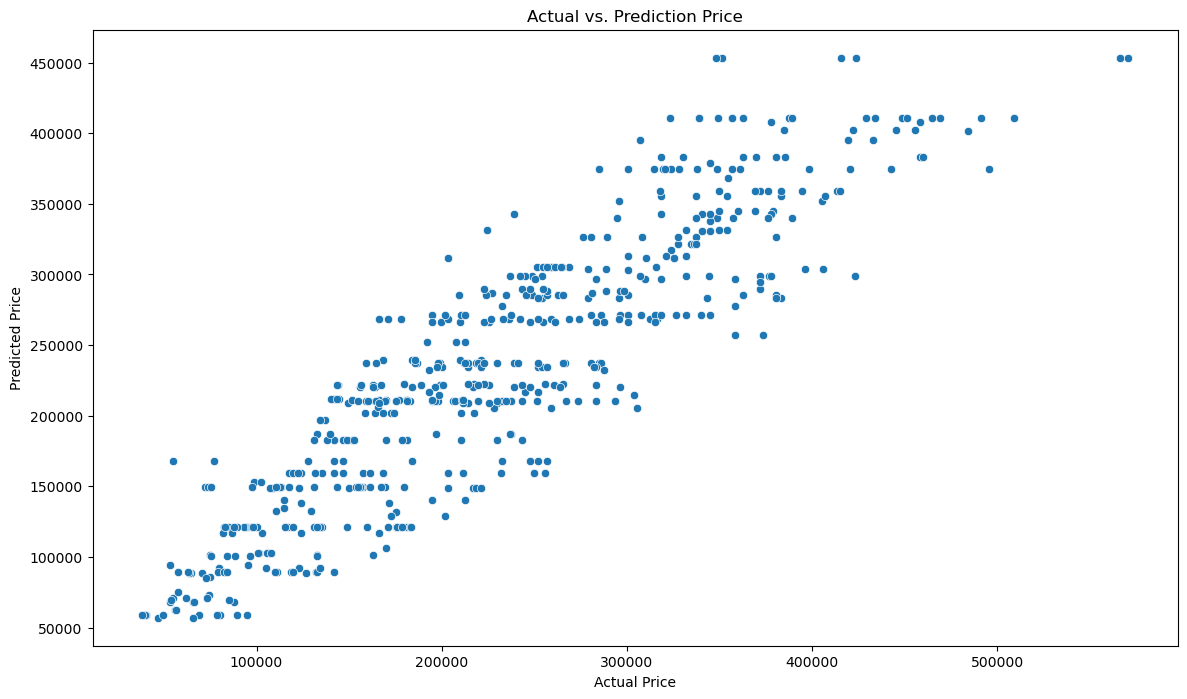

In [82]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Price',  
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan pengecekkan mengenai residual plot diatas, terlihat dimana grafik akan semakin menyebar jika harga semakin tinggi, dan dapat diakatakan bahwa semakin tinggi harganya maka akan semakin rendah akurasi dari prediksi tersebut

In [84]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred

df_residual = pd.DataFrame({
    'y_pred': y_pred_tree_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
4007,238053.0,-20619.259550
596,221680.5,1752.298650
2010,75221.0,-10818.525704
1437,54867.0,-6772.371530
808,266371.0,82324.914836


<AxesSubplot:xlabel='SalePrice'>

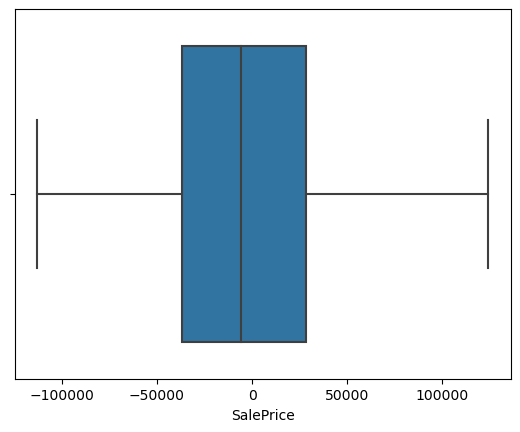

In [85]:
# Check apakah residual memiliki outlier

sns.boxplot(data=df_residual,x=residual) 

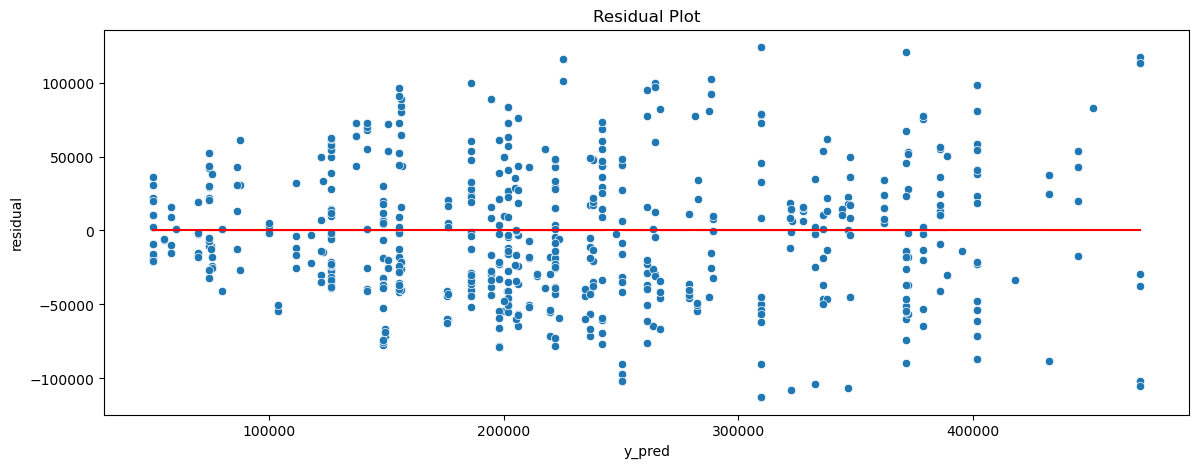

In [86]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.show()

In [93]:
harga = pd.DataFrame({'Predicted Price': [y_pred.mean()], 'Actual Price': [y_test.mean()]})
harga


,Predicted Price,Actual Price
0,232859.977777,229831.763401


In [96]:
akurasi = (harga['Actual Price'] / harga['Predicted Price'])*100
akurasi

0    98.699556
dtype: float64

Diatas adalah hasil perhitungan nilai akurasi dari prediksi harga apartemen di Daegu menggunakan model regresi Decision Tree. dari perhitungan diatas, terlihat bahwa akurasi dari model tersebut adalah 98.69%

**Feature Importance**

Kita akan melakukan evaluasi terhadap feature yang mempengaruhi harga apartment di Daegu, Korea Selatan dalam model Decision Tree Regressor melalui function feature importance.

In [99]:
transformers=ColumnTransformer([
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

# Fit column transformer ke data training
transformers.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('BinaryEncoding', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['TimeToSubway'])])

In [100]:
# Algoritma 

Tree=DecisionTreeRegressor(random_state=8)

pipe_model_trees=Pipeline([
        ('preprocessing',transformers),
        ('modeling',Tree)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_trees=RandomizedSearchCV(
        estimator=pipe_model_trees,                # Model yang hendak di tuning
        param_distributions=hyperparam_tree,      # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Memaksimalkan processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [101]:
# Fit model dengan hyperparameter tuning pada data training

randomsearch_trees.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pack

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               Or

In [102]:
# Define model terhadap estimator terbaik

tree_tunings=randomsearch_trees.best_estimator_

# Fitting model

tree_tunings.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(),
                                                  ['SubwayStation']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['TimeToSubway'])])),
                ('modeling',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       min_samples_leaf=5, min_samples_split=6,
                                       random_state=8))])

In [103]:
# Feature importances

feature_imp=pd.Series(tree_tunings['modeling'].feature_importances_, transformers.get_feature_names()).sort_values(ascending=False)
feature_imp.to_frame(name='Feature Importances')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


,Feature Importances
OneHotEncoding__x0_terraced,0.415813
Size(sqf),0.298229
N_Parkinglot(Basement),0.183498
N_FacilitiesNearBy(ETC),0.054792
N_FacilitiesNearBy(PublicOffice),0.023962
YearBuilt,0.011186
N_FacilitiesInApt,0.008779
BinaryEncoding__SubwayStation_3,0.001718
OrdinalEncoding__TimeToSubway,0.000671
BinaryEncoding__SubwayStation_2,0.000635


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


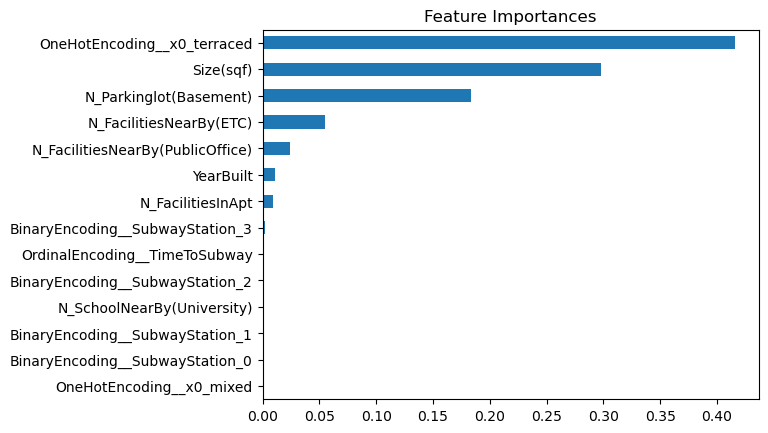

In [104]:
# Plot feature importances

feature_imp=pd.Series(tree_tunings['modeling'].feature_importances_, transformers.get_feature_names()).sort_values(ascending=True)
feature_imp.plot(kind='barh', title='Feature Importances')

plt.show()

# CONCLUSION

Setelah melakukan pemodelan dan pengujian menggunakan berbagai jenis model regresi, didapatkan hasil evaluasi berdasarkan metrik-metrik yang digunakan. Model yang diuji meliputi Random Forest Regressor, Decision Tree Regressor, XGBoost Regressor, Voting Regressor, Stacking Regressor, KNN Regressor, Linear Regression, Lasso Regression, Ridge Regression dan SVR.

Berikut adalah hasil pengujian metrik evaluasi untuk beberapa model tersebut:

Model Random Forest Regressor menghasilkan nilai R2 sebesar 0.800099, RMSE sebesar 46886.208031, MAE sebesar 37806.336434, dan MAPE sebesar 19.35%.
Model Decision Tree Regressor menghasilkan nilai R2 sebesar 0.798259, RMSE sebesar 47087.515123, MAE sebesar 37947.755779, dan MAPE sebesar 19.43%.
Model XGBoost Regressor menghasilkan nilai R2 sebesar 0.797535, RMSE sebesar 47191.030367, MAE sebesar 37968.766175, dan MAPE sebesar 19.45%.
Dari hasil tersebut, model terbaik yang digunakan untuk memprediksi harga apartemen di Daegu, Korea Selatan adalah Decision Tree Regressor yang telah dituning, dengan nilai MAPE sebesar 19.07%.

Menurut penelitian Lewis (1982), model dengan nilai MAPE sebesar 10% hingga 20% dapat diinterpretasikan sebagai model dengan kemampuan peramalan yang baik. Oleh karena itu, model Decision Tree Regressor yang telah dituning ini dapat dianggap baik dalam melakukan prediksi harga apartemen di Daegu.

Namun, perlu diingat bahwa prediksi harga apartemen dapat meleset dari harga apartemen sebenarnya. Hal ini disebabkan oleh keterbatasan fitur yang digunakan dalam pemodelan. Oleh karena itu, model ini perlu ditingkatkan lagi dengan menambahkan lebih banyak fitur atau melakukan penyesuaian pada parameter model.

Berdasarkan model Decision Tree Regressor yang telah dituning, fitur yang paling berpengaruh terhadap harga apartemen adalah tipe apartemen terraced, ukuran apartemen (Size), dan jumlah tempat parkir basement.

Dengan adanya model regresi ini, agen real estate dapat menentukan harga jual apartemen yang tepat di Daegu, Korea Selatan, sehingga dapat meningkatkan tingkat keberhasilan dalam memasarkan dan menjual unit apartemen tersebut. Selain itu, model regresi ini juga dapat membantu agen real estate dalam memahami bagaimana karakteristik apartemen dan harga apartemen saling berhubungan. Sehingga, model ini sangat membantu dibandingkan sebelum adanya model regresi.

# RECOMMENDATION

1. Optimalisasi Model: Meskipun Decision Tree Regressor menunjukkan performa yang paling baik dari model-model lainnya, masih ada ruang untuk peningkatan. Oleh karena itu, disarankan untuk melakukan penelitian lebih lanjut dengan mempertimbangkan fitur-fitur lain yang dapat mempengaruhi harga apartemen di Daegu.
2. Tuning Parameter: Sebagai langkah lanjutan, disarankan untuk melakukan tuning pada parameter model. Mungkin ada kemungkinan untuk meningkatkan akurasi model dengan menyesuaikan parameter tersebut.

3. Evaluasi Model Lain: Meski Decision Tree Regressor memberikan hasil yang paling baik, evaluasi model lain seperti Neural Networks atau LightGBM juga bisa dilakukan. Model-model tersebut bisa memiliki potensi untuk menghasilkan prediksi yang lebih akurat.

4. Implementasi Model: Gunakan model ini sebagai alat pendukung dalam menentukan harga jual apartemen. Ini akan membantu agen real estate memaksimalkan keuntungan dan meningkatkan tingkat keberhasilan dalam penjualan.

5. Pelatihan Agen Real Estate: Agen real estate harus dilatih untuk memahami model ini dan cara kerjanya. Mereka harus dapat menerapkan pengetahuan ini dalam proses penjualan mereka.

6. Analisis Lebih Lanjut: Analisis lebih lanjut pada fitur yang paling berpengaruh terhadap harga apartemen dapat memberikan wawasan lebih mendalam tentang pasar apartemen di Daegu. Fitur ini dapat dianalisis lebih lanjut untuk melihat bagaimana perubahan dalam fitur-fitur ini dapat mempengaruhi harga apartemen.

7. Pengembangan Model Prediktif Selanjutnya: Gunakan pengetahuan yang diperoleh dari model ini untuk mengembangkan model prediktif untuk apartemen di lokasi lain.

# Save Machine Learning

In [105]:
# Import pickle

import pickle as pickle

In [106]:
# Save Machine Learning

pipe_model=Pipeline([('preprocessing',transformer),('model',DecisionTreeRegressor())])
pipe_model.fit(x_train,y_train)

pickle.dump(pipe_model,open('data_daegu_apartment.sav','wb'))

In [107]:
# Load Machine Learning

file_name='data_daegu_apartment.sav'

loaded_model=pickle.load(open(file_name,'rb'))

In [108]:
mean_absolute_percentage_error(y_test,loaded_model.predict(x_test))

0.1892325613119026

In [109]:
np.sqrt(mean_squared_error(y_test,loaded_model.predict(x_test)))

45190.33687681322